SDA Project

Michele Barbella

0622701341

Academic Year 2019/2020


# 1 Operazioni preliminari

## 1.1 Colab Setup

In [ ]:
# Connessione del Notebook all' account di Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Selezionare l'apposita cartella di lavoro.
# N.B. Potrebbe essere necessario cambiare il percorso
import os
dir = '/content/drive/MyDrive/SDA_Barbella/BankNote'
os.chdir(dir)

import warnings
warnings.filterwarnings("ignore");

Mounted at /content/drive


## 1.2 Spark Setup

In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.0.0
!wget --no-check-certificate https://mirror.nohup.it/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.3-bin-hadoop2.7.tgz
#!rm spark-3.0.3-bin-hadoop2.7.tgz
# install findspark 
!pip install -q findspark

--2022-06-09 15:34:38--  https://mirror.nohup.it/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving mirror.nohup.it (mirror.nohup.it)... 81.29.196.57
Connecting to mirror.nohup.it (mirror.nohup.it)|81.29.196.57|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz.6’

spark-3.0.3-bin-had 100%[===================>] 210.19M  6.67MB/s    in 49s     

2022-06-09 15:35:29 (4.30 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz.6’ saved [220400553/220400553]



In [ ]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = dir + "/spark-3.0.3-bin-hadoop2.7"

import findspark
findspark.init()

import pyspark
# The number of clusters is just an example since we are using a single machine
NCluster = 4
conf = pyspark.SparkConf().setMaster(f"local[{NCluster}]").setAppName('SDAProjectSpark')
sc = pyspark.SparkContext(conf=conf)

## 1.3 Funzioni utili

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


def plot_gaussian_3D(mean, cov, xlim=[0,1], ylim=[0,1], xlabel='X Label', ylabel='Y Label', title='Z', cmap=cm.jet):

    """
    Questo codice è un trucco analogo all'uso di meshgrid in MATLAB.
    Costruisce il contour plot di una distribuzione gaussiana bivariata
    avente il vettore delle medie e la matrice di covarianza specificati negli argomenti
    """

    # step 1: creazione della griglia
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

    # step 2: impilo la griglia
    xx_yy = np.dstack((xx, yy))

    # step 3: costruzione del grafo
    rv = multivariate_normal(mean, cov)

    # step 4: creo un grafo 3D
    pos = np.empty(xx.shape + (2,))
    pos[:, :, 0] = xx
    pos[:, :, 1] = yy
    ax = plt.gca(projection='3d')
    ax.plot_surface(xx, yy, rv.pdf(pos), cmap=cmap, linewidth=0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


def my_plot_Gaussians(mean, cov, color):
    """
    Questo codice è un trucco analogo all'uso di meshgrid in MATLAB.
    Costruisce il contour plot di una distribuzione gaussiana bivariata
    avente il vettore delle medie e la matrice di covarianza specificati negli argomenti
    """
    # step 1: ottengo i confini della griglia 
    ax = plt.gca(); xlim = ax.get_xlim(); ylim = ax.get_ylim();

    # step 2: creo la griglia 
    yy, xx = np.meshgrid(np.linspace(ylim[0], ylim[1], 100), np.linspace(xlim[0], xlim[1], 100))

    # step 3: impilo la griglia 
    xx_yy = np.dstack((xx, yy))

    # step 4: costruisco il grafo
    rv = multivariate_normal(mean, cov)
    ax.contourf(xx, yy, rv.pdf(xx_yy), colors=color, alpha=0.2,  levels=[0.15, 10])


def print_fit_performance(Y_test, Y_estimated):
    
    """
    Questa funzione viene utilizzata per plottare alcune metriche di performance:
    - la matrice di confusione
    - il report di classificazione
    - il punteggio di precisione
    """

    print('Confusion matrix:')
    print(confusion_matrix(Y_test, Y_estimated))

    print('\n\nClassifier metrics:')
    print(classification_report(Y_test, Y_estimated))

    #From documentation: the precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    print('\nPrecision Score: ')
    print(precision_score(Y_test, Y_estimated))
    print('\n')


def parabolic_curve(n, a=1, b=0, c=0):
    """Generates n points on a parabolic curve defined by the values passed as 
      parameters. Returned values are integers."""
    # generating the points on the curve
    curve = [int(a * x**2 + b*x + c) for x in range(n)]

    # removing identical consecutive values
    for i in range(1,len(curve)):
        curve[i] = max(curve[i-1]+1, curve[i])
        
    return curve


def parabolic_curve_float(n, a=1, b=0, c=0, precision=4):
    """Generates n points on a parabolic curve defined by the values passed as 
    parameters. Returned values are floats."""
	# generating the points on the curve
    curve = [round(a*x**2 + b*x + c, precision) for x in range(n)]

    # removing identical consecutive values depending on precision
    for i in range(1, len(curve)):
        curve[i] = round(max(curve[i-1] + 10**(-precision), curve[i]), precision)

    return curve


def most_common(x):
    """Returns the most common value in a dictionary"""
    return max(set(x), key=list(x).count)


def train_test_val_split(X, Y, test_size=0.3, val_size=0.2):
    """
    Questa funzione divide il dataset in 3 parti:
    - training set
    - validation set
    - test set
    """
    if not 0 < test_size < 1 or not 0 < val_size < 1:
        raise ValueError("test_size and val_size must be in ]0,1[")

    if not test_size + val_size < 1:
        raise ValueError("the sum of test_size and val_size must be less than 1")

    # prima divisione
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size+val_size)

    # seconda divisione, con ridimensionamento della dimensione di split, per fare in modo che, la 
    # somma delle dimensioni dei tre blocchi di dati sia pari a quella iniziale 
    val_size /= val_size + test_size
    X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=val_size)

    return X_train, X_test, X_val, Y_train, Y_test, Y_val


def plot_sigmoid(XX, YY, w, title='Decision Regions'):
    """Given w, plot the controur filled plot of the sigmoid function: 1/(1+e^(-w[0]-w[1]*x-w[2]*y))
    in a certain range of x and y."""

    f = plt.figure()

    # step 0: plot the training set
    plt.scatter(XX[:, 0], XX[:, 1], c=YY, cmap='RdBu')
    # step 1: get the boundaries of the grid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # step 2: create the grid
    yy, xx = np.meshgrid(np.linspace(ylim[0], ylim[1], 30), np.linspace(xlim[0], xlim[1], 30))
    # step 3: compute the function values for any x in xx and y in yy
    pp = np.divide(1, 1 + np.exp(- w[0] - w[1]*xx - w[2]*yy));  
    # step 4: plot decision boundary and margin
    contour = ax.contourf(xx, yy, pp, 25, cmap="RdBu", alpha=0.6,
                          levels=[i/10 for i in range(11)], zorder=0)
    ax.set_title(title)
    f.colorbar(contour)
    plt.show()

## 1.4 Analisi Dataset

https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci

In [ ]:
import pandas as pd
data = pd.read_csv("BankNote.csv")

# viene determinata la lunghezza del dataset
N = len(data)
n = [None]*2

print('Numero di osservazioni: ', N)
data.head()

Numero di osservazioni:  1372


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# Date le due classi(0,1), vengono selezionate le istanze in cui la colonna 'class' 
# assume valore 0 o 1. Inoltre viene anche determinato il numero di campioni per ciascuna
n = [None]*2
N = len(data)

for temp in range(0,2):
    istemp = data['class'] == temp
    n[temp] = len(data[istemp])
    print(f'{temp}: {n[temp] / N * 100: .2f}%')



# CLASSI
# 0 Non Valid
# 1 Valid
print('\n')
print('Numero di elementi nel database: ', N)
print('Elementi colonna class: ', n)

0:  55.54%
1:  44.46%


Numero di elementi nel database:  1372
Elementi colonna class:  [762, 610]


## 1.5 Bilanciamento dataset

Osserviamo che il dataset non è bilanciato

In [ ]:
# bilanciamento dataset
data2 = data.loc[data['class']==0].sample(610)
data1 = data.loc[data['class']==1]
print(len(data2))
print(len(data1))

610
610


In [ ]:
# fusione dei due dataframe
balanced = pd.concat([data1, data2], ignore_index=True)

# shuffle 
balanced = balanced.sample(frac=1).reset_index(drop=True)
print(len(balanced))

1220


## 1.6 Normalizzazione del dataset

In [ ]:
balanced.head()

,variance,skewness,curtosis,entropy,class
0,-3.3553,0.35591,2.6473,-0.37846,1
1,3.1887,-3.41430,2.7742,-0.20260,0
2,-1.1005,-7.25080,6.0139,0.36895,1
3,1.4806,7.63770,-2.7876,-1.03410,0
4,-2.3361,11.96040,3.0835,-5.44350,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
data=pd.DataFrame(scaler.fit_transform(balanced),
            columns=balanced.columns, index=balanced.index) 

data.head()

,variance,skewness,curtosis,entropy,class
0,0.265871,0.528687,0.341758,0.742859,1.0
1,0.737786,0.387611,0.347225,0.758850,0.0
2,0.428474,0.244055,0.486786,0.810820,1.0
3,0.614607,0.801161,0.107631,0.683243,0.0
4,0.339369,0.962911,0.360549,0.282304,0.0


## 1.7 Scrittura del dataset bilanciato e normalizzato su file

In [ ]:
data.to_csv('banknote_n&b.csv', index=False)

# 2 Lettura Dataset

In [ ]:
import pandas as pd
data = pd.read_csv("banknote_n&b.csv", index_col=False)

In [ ]:
for col in data.columns:
    print(col)


n = [None]*2
N = len(data)

for temp in range(0,2):
    istemp = data['class'] == temp
    n[temp] = len(data[istemp])

variance
skewness
curtosis
entropy
class


In [ ]:
# Getting the list of columns
col = data.columns
col = len(col)
# Printing Number of columns
print('Number of columns :', col)

features = [data.columns[i] for i in range(col-1)]
print('Features: ',features)


Number of columns : 5
Features:  ['variance', 'skewness', 'curtosis', 'entropy']


## 2.1 Matrice di covarianza

In [ ]:
data[features].cov()

,variance,skewness,curtosis,entropy
variance,0.042710,0.012282,-0.014945,0.011082
skewness,0.012282,0.048276,-0.033210,-0.021305
curtosis,-0.014945,-0.033210,0.036167,0.011071
entropy,0.011082,-0.021305,0.011071,0.035973


## 2.2 Matrice di correlazione

Una tabella che contiene tutti numeri prossimi ad uno è indice di una cattiva diversificazione o, di una diversificazione apparente.

In [ ]:
data[features].corr()

,variance,skewness,curtosis,entropy
variance,1.000000,0.270477,-0.380265,0.282723
skewness,0.270477,1.000000,-0.794782,-0.511239
curtosis,-0.380265,-0.794782,1.000000,0.306923
entropy,0.282723,-0.511239,0.306923,1.000000


# 3 Dataset Sintetico

## 3.1 Media e varianza di 2 feature specificate

In [ ]:
import numpy as np

"""
E' possibile selezionare 2 tra le features disponibili, 
'variance',
'skewness',
'curtosis',
'entropy', 
di cui saranno valutate le medie e le varianze per ciascuna delle due classi. 

N.B. La scelta non è obbligatoria: ciascuna coppia di features può essere utilizzata per le analisi.
"""


f1_name = 'curtosis'
f2_name = 'variance'

f1 = [None]*2
f2 = [None]*2

mean = {
    f1_name: [None]*2,
    f2_name: [None]*2,
}
var = {
    f1_name: [None]*2,
    f2_name: [None]*2,
}

for temp in range(0,2):
    istemp = data['class'] == temp

    f1[temp] = data[istemp][f1_name] # vengono selezionati i campioni per la classe (0 o 1) e per la feature indicata
    f2[temp] = data[istemp][f2_name] 

    mean[f1_name][temp] = f1[temp].mean() # ne viene determinata la media 
    var[f1_name][temp] = f1[temp].var()   # ne viene determinata la varianza

    mean[f2_name][temp] = f2[temp].mean() 
    var[f2_name][temp] = f2[temp].var()

# class 0 ==> Non valid
# class 1 ==> Valid

mf1 = mean[f1_name]
vf1 = var[f1_name]

print(f'For class 0 (Non valid), the {f1_name} mean is {mf1[0]:.4f} with variance {vf1[0]:.4f}\n'
      f'For class 1 (Valid), the {f1_name} mean is {mf1[1]:.4f} with variance {vf1[1]:.4f}')

print('\n==========================================================================================\n')

mf2 = mean[f2_name]
vf2 = var[f2_name]

print(f'For class 0 (Non valid), the {f2_name} mean is {mf2[0]:.4f} with variance {vf2[0]:.4f}\n'
      f'For class 1 (Valid), the {f2_name} mean is {mf2[1]:.4f} with variance {vf2[1]:.4f}')

For class 0 (Non valid), the curtosis mean is 0.2625 with variance 0.0193
For class 1 (Valid), the curtosis mean is 0.3203 with variance 0.0514


For class 0 (Non valid), the variance mean is 0.6758 with variance 0.0212
For class 1 (Valid), the variance mean is 0.3731 with variance 0.0184


In [ ]:
for temp in range(0,2):
    istemp = data['class'] == temp
    print(np.cov(data[istemp][f1_name], data[istemp][f2_name]))

[[ 0.01934035 -0.00658183]
 [-0.00658183  0.02120919]]
[[ 0.05137942 -0.01457144]
 [-0.01457144  0.01840361]]


In [ ]:
for temp in range(0,2):
    istemp = data['class'] == temp
    print(np.corrcoef(data[istemp][f1_name], data[istemp][f2_name]))

[[ 1.         -0.32497705]
 [-0.32497705  1.        ]]
[[ 1.         -0.47386692]
 [-0.47386692  1.        ]]


## 3.2 Generazione del dataset sintetico per 2 features selezionate

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal

"""
Sulla base della media e della varianza trovate, viene calcolata la matrice di covarianza tra le due features,
e, quindi, viene determinato un dataset sintetico la cui dimensione è pari a quella del dataset originale,
utilizzando media, varianza e covarianza trovate, e facendo l'assunzione di normalità per le due features.
"""

X = [None]*2
Y = [None]*2

m = [None]*2
c = [None]*2
v = [None]*2

n_samples = [None]*2


for temp in range(0,2):
    n_samples[temp] = n[temp]    
    istemp = data['class'] == temp

    covariance = data[istemp][f1_name].cov(data[istemp][f2_name])
    
    m[temp] = [mean[f1_name][temp], mean[f2_name][temp]]

    c[temp] = [[var[f1_name][temp], covariance], # viene determinata la matrice di covarianza tra le features, e per la classe selezionata
              [covariance, var[f2_name][temp]]]
        
    v[temp] = [var[f1_name][temp], var[f2_name][temp]]

    X[temp] = np.random.multivariate_normal(m[temp], c[temp], n_samples[temp]) # calcolo del dataset sintetico, assumendo una distribuzione normale, ed usando i parametri stimati
    Y[temp] = np.ones((n_samples[temp], 1)) * temp

# fusione e mescolamento del dataset sintetico ottenuto
XX = np.vstack((X[0], X[1]))
YY = np.vstack((Y[0], Y[1]))

XX, YY = shuffle(XX, YY) # mescolamento

In [ ]:
print('Class 0')
print(np.corrcoef(X[0][:, 0], X[0][:, 1]))

print('\n=========================================')
print('Class 1')
print(np.corrcoef(X[1][:, 0], X[1][:, 1]))

Class 0
[[ 1.       -0.346718]
 [-0.346718  1.      ]]

Class 1
[[ 1.         -0.45216146]
 [-0.45216146  1.        ]]


## 3.3 Plot Dataset sintetico per 2 features

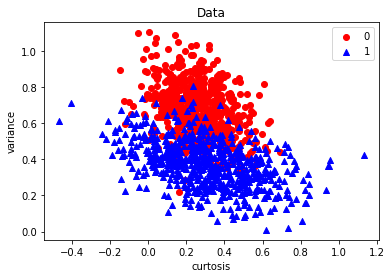

In [ ]:
import matplotlib.pyplot as plt

"""
Viene graficato il dataset sintetico ottenuto precedentemente
"""

color = {
    0: 'r',
    1: 'b'
}
marker = {
    0: 'o',
    1: '^'
}

plt.figure()
plt.title('Data')
for rec in range(0,2):
    plt.scatter(X[rec][:, 0], X[rec][:, 1], color=color[rec], marker=marker[rec], label=str(rec)) # stampa dei punti del dataset
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.show()

## 3.4 Calcolo Media e Varianza di tutte le features

In [ ]:
import numpy as np

"""
In questa cella viene effettuata la stima delle medie e delle varianze per le due classi (0, 1),
e per tutte le features del dataset
"""

# vengono inizializzati tre dizionari
f = dict()
mean = dict()
var = dict()

for feature in features:
  f[feature] = [None] * 2
  mean[feature] = [None] * 2
  var[feature] = [None] *2

for feature in features:
  for temp in range(0,2):
    istemp = data['class'] == temp
    f[feature][temp] = data[istemp][feature]
    mean[feature][temp] = f[feature][temp].mean() 
    var[feature][temp] = f[feature][temp].var()


In [ ]:
# stampa della media e della varianza per tutte le features del dataset 

for feature in features:
    for temp in range(0,2):
        print(f'For class {temp}, the {feature} mean is {mean[feature][temp]:.4f} with variance {var[feature][temp]:.4f}')
        
    print('\n==================================================================\n')


For class 0, the variance mean is 0.6758 with variance 0.0212
For class 1, the variance mean is 0.3731 with variance 0.0184


For class 0, the skewness mean is 0.6695 with variance 0.0374
For class 1, the skewness mean is 0.4782 with variance 0.0409


For class 0, the curtosis mean is 0.2625 with variance 0.0193
For class 1, the curtosis mean is 0.3203 with variance 0.0514


For class 0, the entropy mean is 0.6771 with variance 0.0365
For class 1, the entropy mean is 0.6639 with variance 0.0355




## 3.5 Generazione di DataSet sintetico per tutte le features

In [ ]:
#@title 
#@markdown Select the multiplier for samples number
multiplier =  12 #@param {type:"integer"}


In [ ]:
import numpy as np
from sklearn.utils import shuffle

"""
Usando la stima delle medie, della matrice di covarianza per ciascuna delle classi, viene
determinato un dataset sintetico, facendo l'assunzione di normalità per la ditribuzione dei dati.

N.B. Nel form precedente è possibile specificare il parametro 'multiplier' attraverso cui si può 
rendere grande a piacimento il dataset sintetico.
"""

X_full = [None]*2
Y_full = [None]*2

m_full = [None]*2
c_full = [None]*2
v_full = [None]*2

temp_m = []
temp_v = []

n_samples = [None]*2

for temp in range(0,2):
  n_samples[temp] = n[temp]    
  istemp = data['class'] == temp
  c_full[temp] = data[istemp][features].cov()

  for feature in features:
    # vengono usati due vettori di appoggio, per poi andare a riempire il vettore delle medie e delle varianze
    temp_m.append(mean[feature][temp])
    temp_v.append(var[feature][temp])

  # vengono riempiti i vettori delle medie e delle varianze
  m_full[temp] = temp_m
  v_full[temp] = temp_v

  temp_m = []
  temp_v = []

  if multiplier <= 0: 
    multiplier = 1
  
  # generazione del dataset sintetico per ogni classe e con il numero di campioni opportunamente incrementato
  X_full[temp] = np.random.multivariate_normal(m_full[temp], c_full[temp], n_samples[temp] * multiplier)
  Y_full[temp] = np.ones((n_samples[temp] * multiplier, 1)) * temp

# fusione e mescolamento del dataset
XX_full = np.vstack((X_full[0], X_full[1]))
YY_full = np.vstack((Y_full[0], Y_full[1])) 

XX_full, YY_full = shuffle(XX_full, YY_full) # mescolamento

# 4 Classificatore Naïve-Bayes

## 4.1 Naïve-Bayes, funzioni di Fit and Predict

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

def GNB_fit_and_predict(XX_train, XX_test, YY_train, gnb):
  """
  Effettua l'addestramento del modello utilizzano i dati del training set, e poi fa una predizione sui campioni del test set.
  """
  YY_estimated = gnb.fit(XX_train, YY_train).predict(XX_test) # addestramento e predizione 
  return YY_estimated


def GNB(XX_train, XX_test, YY_train, YY_test, plot_results_flag=True):
    """
    Effettua l'addestramento e la predizione , usando la funzione precedente, e ritorna le performance
    """
    gnb = GaussianNB()
    YY_estimated = GNB_fit_and_predict(XX_train, XX_test, YY_train, gnb)
    performance = gnb.score(XX_test, YY_test) # calcolo delle performance del modello addestrato

    if plot_results_flag:
        print_fit_performance(YY_test, YY_estimated) # stampa delle metriche di performance
        print(f"final performance: {performance * 100: .2f}%") # stampa delle performance

    return performance

## 4.2 Visualizzazione dei dati in 2D

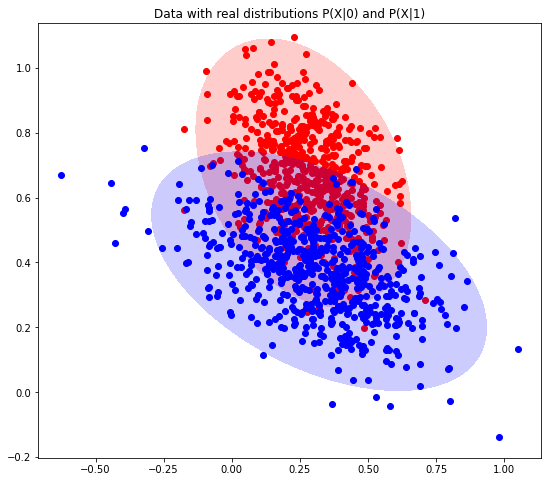

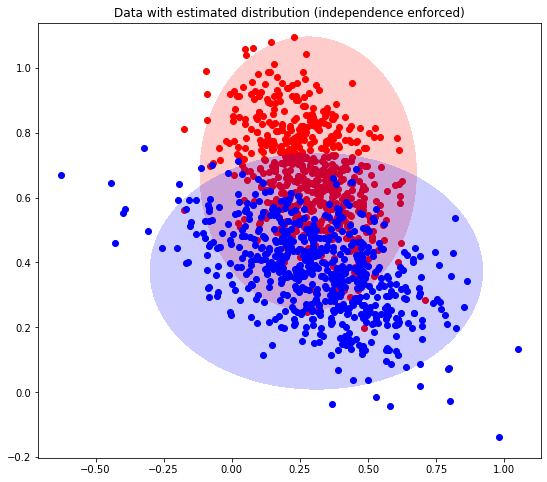

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Vengono realizzati due grafici:
1) contiene i campioni del dataset sintetico, insieme alla distribuzione stimata dal dataset reale.
2) contiene i campioni del dataset sintetico, insieme alla distribuzione stimata dal dataset sintetico
"""
colors =  {
    0: 'r',
    1: 'b',
}


plt.figure(figsize=(9, 8)); plt.title('Data with real distributions P(X|0) and P(X|1)')

for temp in range(0,2):
    plt.scatter(X[temp][:, 0], X[temp][:, 1], color=colors[temp]); my_plot_Gaussians(m[temp], c[temp], colors[temp]) #stampa dei campioni

m_hat = [None]*2
v_hat = [None]*2

plt.figure(figsize=(9, 8)); plt.title('Data with estimated distribution (independence enforced)')

for temp in range(0,2):
    m_hat[temp] = [X[temp][:, 0].mean(), X[temp][:, 1].mean()] # stima della media dei campioni del dataset sintetico, per ognuna delle classi
    v_hat[temp] = [X[temp][:, 0].std()**2, X[temp][:, 1].std()**2] # stima della varianza dei campioni del dataset sintetico, per ognuna delle classi

    # N.B. in questo caso viene passata la sola varianza e cioè i soli valori lungo la diagonale della 
    # matrice di covarianza. Quindi si presuppone che la covarianza tra le features sia nulla 
    # ==> si assume l'indipendenza delle due features

    plt.scatter(X[temp][:, 0], X[temp][:, 1], color=colors[temp]); my_plot_Gaussians(m_hat[temp], v_hat[temp], colors[temp])


## 4.3 Visualizzazione dei dati in 3D

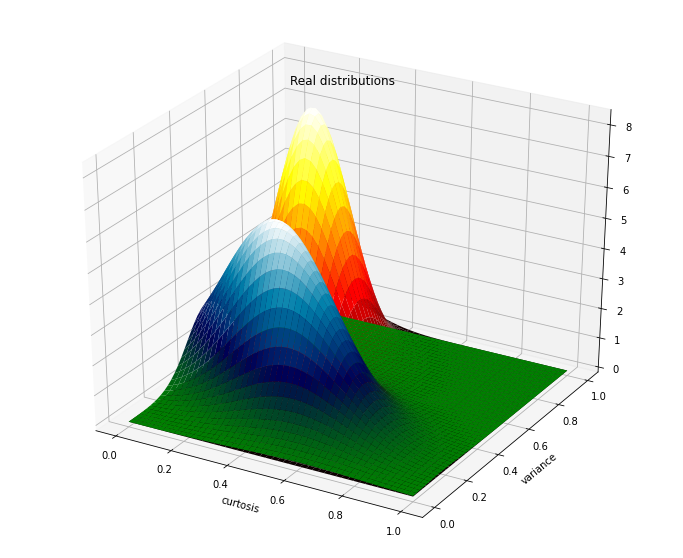

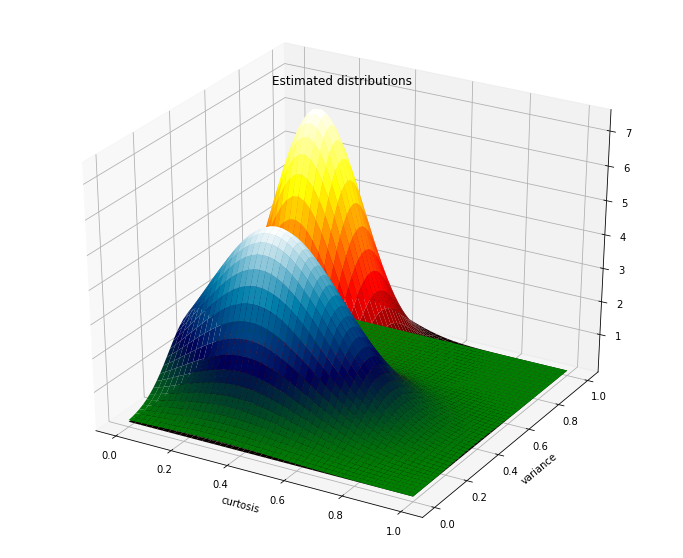

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

"""
Viene realizzata la stampa delle distribuzioni in 3D:
1) viene plottata la distribuzione stimata dai dati reali
2) viene plottata la distribuzione stimata dal dataset sintetico
"""

limits = {
    'x': [0, 1],
    'y': [0, 1]
}
colors = {
    0: cm.hot,
    1: cm.ocean,
}

# The first is the real one, with the correct values of covariance.
plt.figure(figsize=(12, 10))

for temp in range(0,2):

    plot_gaussian_3D(m[temp], c[temp], xlim=limits['x'], ylim=limits['y'],
                     xlabel=f1_name, ylabel=f2_name, title='Real distributions', cmap=colors[temp])
plt.show()

# The second is the one used by the Naïve-Bayes classifier, which assumes that
# the covariances are 0 as the features are supposed independent

m_hat = [None]*2
v_hat = [None]*2

plt.figure(figsize=(12, 10))

for temp in range(0,2):
    m_hat[temp] = [X[temp][:, 0].mean(), X[temp][:, 1].mean()] # stima della media dei campioni del dataset sintetico, per ognuna delle classi
    v_hat[temp] = [X[temp][:, 0].std()**2, X[temp][:, 1].std()**2] # stima della varianza dei campioni del dataset sintetico, per ognuna delle classi

    plot_gaussian_3D(m_hat[temp], v_hat[temp], xlim=limits['x'], ylim=limits['y'],
                     xlabel=f1_name, ylabel=f2_name, title='Estimated distributions',
                     cmap=colors[temp])
plt.show()



## 4.4 Risultati

### DataSet sintetico usando 2 festures selezionate

In [ ]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3) # viene effettuata la divisione in training set e test set del dataset sintetico 

GNB(XX_train, XX_test, YY_train, YY_test);

Confusion matrix:
[[163  27]
 [ 19 157]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       190
         1.0       0.85      0.89      0.87       176

    accuracy                           0.87       366
   macro avg       0.87      0.87      0.87       366
weighted avg       0.88      0.87      0.87       366


Precision Score: 
0.8532608695652174


final performance:  87.43%


### DataSet sintetico usando tutte le features insieme

In [ ]:
from sklearn.model_selection import train_test_split

"""
Viene effettuato l'addestramento e la predizione utilizzando il dataset sintetico esteso, quello che 
comprende tutte le features. 

N.B. E' possibile confrontare i risultati tra dataset reale e dataset sintetico andando a stettare un moltiplicatore pari a 0 oppure ad 1
"""
XX_train, XX_test, YY_train, YY_test = train_test_split(XX_full, YY_full, test_size=0.3) # divisione 

GNB(XX_train, XX_test, YY_train, YY_test);

Confusion matrix:
[[1990  245]
 [ 235 1922]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2235
         1.0       0.89      0.89      0.89      2157

    accuracy                           0.89      4392
   macro avg       0.89      0.89      0.89      4392
weighted avg       0.89      0.89      0.89      4392


Precision Score: 
0.8869404706968159


final performance:  89.07%


### DataSet reale usando 2 festures selezionate

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

"""
Viene effettuato l'addestramento e la predizione usando solamente le due features che sono state indicate precedentemente 
"""


X_real = pd.concat([data[f1_name], data[f2_name]], axis=1)
Y_real = data['class'] # class viene utilizzato come feature su cui fare classificazione 

X_real, Y_real = shuffle(X_real, Y_real) # mescolamento

XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3) # divisione del datataset

GNB(XX_train, XX_test, YY_train, YY_test);

Confusion matrix:
[[166  31]
 [ 28 141]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       197
         1.0       0.82      0.83      0.83       169

    accuracy                           0.84       366
   macro avg       0.84      0.84      0.84       366
weighted avg       0.84      0.84      0.84       366


Precision Score: 
0.8197674418604651


final performance:  83.88%


### DataSet reale usando una feature alla volta

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np

"""
Viene effettuato l'addestramento e la predizione usando una feature per volta. 
Viene riportata una tabella in cui sono inserite le performance per ciascuna delle features
"""

res = [] # vettore che conterrà i risultati

for feature in features:  
        X_real = pd.concat([data[feature]], axis=1)
        Y_real = data['class']
        
        X_real, Y_real = shuffle(X_real, Y_real) # mescolamento
        
        # divisione dataset
        XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)

        res.append(GNB(XX_train, XX_test, YY_train, YY_test, plot_results_flag=False)) # aggiunta al vettore dei risultati ottenuti al vettore res

# Tabella con  risultati.
table = tabulate(np.array([[f'{r*100:.2f}%' for r in res]]), features, tablefmt="fancy_grid")
print(table)

╒════════════╤════════════╤════════════╤═══════════╕
│ variance   │ skewness   │ curtosis   │ entropy   │
╞════════════╪════════════╪════════════╪═══════════╡
│ 87.43%     │ 60.11%     │ 60.11%     │ 49.45%    │
╘════════════╧════════════╧════════════╧═══════════╛


### DataSet reale usando tutte le possili coppie di features

In [ ]:
from itertools import combinations
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np

"""
Vengono eseguiti l'addestramento e la predizione per tutte le possibili coppie di features, 
ad eccezione di class. Le performance vengono riportate in un'apposita tabella 
"""
res = []

for (x1,x2) in combinations(features, 2):
        X_real = pd.concat([data[x1], data[x2]], axis=1)
        Y_real = data["class"]

        X_real, Y_real = shuffle(X_real, Y_real)

        XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)

        res.append(GNB(XX_train, XX_test, YY_train, YY_test, plot_results_flag=False))

table = tabulate(np.array([[f'{r*100:.2f}%' for r in res]]),
                 [f"{x1} + {x2}" for (x1,x2) in combinations(features, 2)],
                 tablefmt="fancy_grid")
print(table)

╒═══════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════╕
│ variance + skewness   │ variance + curtosis   │ variance + entropy   │ skewness + curtosis   │ skewness + entropy   │ curtosis + entropy   │
╞═══════════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════╡
│ 89.62%                │ 81.15%                │ 84.70%               │ 58.74%                │ 62.57%               │ 59.02%               │
╘═══════════════════════╧═══════════════════════╧══════════════════════╧═══════════════════════╧══════════════════════╧══════════════════════╛


### DataSet reale usando tutte le features insieme

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

""" 
Viene realizzato l'addestramento e la predizione utilizzando tutte le features del dataset reale.
Il tutto si conclude con la stampa delle performance.
"""
for feature in features:
        X_real = pd.concat([data[feature]], axis=1)

Y_real = data['class']

X_real, Y_real = shuffle(X_real, Y_real)

XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)

GNB(XX_train, XX_test, YY_train, YY_test);

Confusion matrix:
[[101  82]
 [ 93  90]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.52      0.55      0.54       183
         1.0       0.52      0.49      0.51       183

    accuracy                           0.52       366
   macro avg       0.52      0.52      0.52       366
weighted avg       0.52      0.52      0.52       366


Precision Score: 
0.5232558139534884


final performance:  52.19%


# 5 KNN

## 5.1 Funzioni utili per SPARK

In [ ]:
from math import sqrt
import numpy as np
import heapq

def euclidean_distance(yx_train):

    """
    Questa funzione viene utilizzata da Spark per calcolare la distanza euclidea tra il valore 
    x di test mandato in broadcast e quello passato come parametro. Questa funzione viene chiamata 
    quando il cluster cerca i KNN in ogni partizione
    """

    x_train = yx_train[1:]  
    distance = 0.0
    for i in range(len(x_train)):
        distance += (x_train[i] - x_test_br.value[i])**2
    return sqrt(distance)


def K_nearest_neighbors(collection):

    """
    Questa funzione è usata da Spark per ottenere il punto K con la distanza 
    euclidea minima rispetto a un dato punto.
    """
    return np.array(heapq.nsmallest(K_br.value, collection, euclidean_distance))

## 5.2 Funzioni KNN di Fit e Predict

Si può selezionare la step size che viene impiegata per la meshgrid

In [ ]:
#@title 
#@markdown KNN step size meshgrid
step_size_mesh =  0.02#@param {type:"number"}



In [ ]:
from sklearn import neighbors
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from operator import add


K_br = None
x_test_br = None


def KNN_fit_and_predict_spark(K, XX_train, XX_test, YY_train):
    """
    Questa funzione effettua l'addestramento e la predizione: dopo aver parallelizzato il dataset, 
    viene mandato in broadcast il parametro K, e quindi per ogni X appartenente al test set  
    vengono determinati i k vicini più vicini, usando spark.
    Successivamente vengono parallelizzate le label che vengono fuori, e quindi si va a deteminare 
    il numero di 1 presenti: se questo supera k/2 si sceglie per la classe 1, alrimenti la 0
    """

    # viene creato il dataset
    YY__XX_train = np.column_stack((YY_train, XX_train))
    
    # viene parallelizzato il dataset dataset
    rdd = sc.parallelize(YY__XX_train).cache()

    # broadcast di K
    global K_br
    K_br = sc.broadcast(K)

    # YY_estimated conterrà le Y predette 
    YY_estimated = []
    
    for x_test in XX_test:
        # broadcast di ogni x del test set
        global x_test_br
        x_test_br = sc.broadcast(x_test)

        # vengono cercati i k vicini più vicini alla x di test 
        KNN = K_nearest_neighbors(rdd.mapPartitions(K_nearest_neighbors).collect())
        
        # vengono parallelizzate le labels 
        KNN_rdd = sc.parallelize(KNN[:,0]).cache()
        
        # viene calcolato il numero di uno in ogni partizione 
        total_ones = KNN_rdd.reduce(add)

        # se il numero di 1 è maggiore di k/2, aggiungi a YY_estimated 1 altrimenti 0
        YY_estimated.append(int(total_ones > K/2))

    return np.array(YY_estimated)



def KNN_fit_and_predict_no_spark(K, knn,  XX_train, XX_test, YY_train):

    """
    Viene fatta l'addestrameto del modello e la predizione utilizzando le funzioni di libreria
    """
    YY_estimated = knn.fit(XX_train, YY_train).predict(XX_test)
    return YY_estimated



def KNN_fit_and_predict_comparison(K, knn, XX_train, XX_test, YY_train):

    """
    Questa funzione realizza il confronto tra la predizione fatta utilizzando spark, e quella senza:
    nel caso queste non combacino, viene generata un'eccezione, altrimenti viene restituita la Y predetta 
    """

    YY_estimated = KNN_fit_and_predict_no_spark(K=K, knn=knn,  XX_train=XX_train, XX_test=XX_test, YY_train=YY_train)
    
    YY_estimated_spark = KNN_fit_and_predict_spark(K=K,  XX_train=XX_train, XX_test=XX_test, YY_train=YY_train)

    if not np.array_equal(YY_estimated, YY_estimated_spark):  # viene effettuato il confronto: nel caso di discrepanza viene generata un'eccezione 
        raise Exception("Bad implementaion of KNN with Spark!")

    return YY_estimated



def KNN_plot(K, knn, XX_train, YY_train):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    h = step_size_mesh # step size per la meshgrid. Può essere selezionata nel form superiore
        
    # Si determinano i confini
    # [x_min, x_max]x[y_min, y_max].

    x_min, x_max = XX_train[:, 0].min() - 1, XX_train[:, 0].max() + 1
    y_min, y_max = XX_train[:, 1].min() - 1, XX_train[:, 1].max() + 1

    # viene ottenuta la meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # vengono fatte le predizioni per i valori della meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    # [xx[1], yy[1]], [xx[2], yy[2]]---> _c Converte gli oggetti slice in concatenazione lungo il secondo asse

    # Viene realizzto un grafico a colori con i risultati
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light) 

    # stampa dei punti del training set
    plt.scatter(XX_train[:, 0], XX_train[:, 1], c=YY_train, cmap=cmap_bold, edgecolor='k', s=20)   #stampa dei punti del training set
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(f"0/1 outcome classification (K={K})")
    plt.show()



def KNN(K, XX_train, XX_test, XX_val, YY_train, YY_test, YY_val, comparison=False, plot_flag=False, plot_results_flag=True):
    """
    Nel caso il parametro comparison è settato su True, verrebbe effettuata la comparazione di
    predizioni tra le due versioni, con spark e senza. Nel caso opposto viene effettuata la predizione
    solamente con funzioni di libreria. In ogni caso vengono determinate le performances sui dati del test set.

    Nel caso di utilizzo di più di due features, il parametro plot_flag deve essere settato a false, 
    altrimenti un errore è generato.

    Se plot_results_flag è settato su true vengono stampate le performances

    Ritorna le performances sul test set e l'MSE sul validation set uato per ottimizzare K

    """
    knn = neighbors.KNeighborsClassifier(K, weights='uniform') # KNN di libreria 

    if comparison: # se è true viene effettuata la comparazione delle predizioni
        YY_estimated = KNN_fit_and_predict_comparison(K, knn, XX_train, XX_val, YY_train)
    else:
        YY_estimated = KNN_fit_and_predict_no_spark(K, knn,  XX_train, XX_val, YY_train)

    performance = knn.score(XX_test, YY_test)

    if plot_flag:
        # solo nel caso di due features
        KNN_plot(K, knn, XX_train, YY_train)
    
    val_MSE = mean_squared_error(YY_val, YY_estimated) # Calcolo dell'MSE sul validation set. Usato per ottimizzare k

    if plot_results_flag:
        print('========================================================================================================================')
        print(f"Performance for K = {K}: {performance * 100: .2f}%")
        YY_estimated = knn.predict(XX_test)
        print('\n')
        print_fit_performance(YY_test, YY_estimated)

    return performance, val_MSE


## 5.3 K-tuning KNN

In [ ]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt


def KNN_tuning(XX, YY, maxK=100, nk=31, comparison=False, plot_steps=None, best_K_plot_flag=False, plot_results_flag=True):

    """
    Questa funzione consente di effettuare il tuning del parametro k: prende come parametri di input 
    il massimo numero di K, ed il numero di k da testare. A questo punto seleziona nk tra 1 e 
    maxK e cerca quello che ottimizza l'MSE sul validation set. 
    Pertanto il dataset passato, viene diviso in 3 parti selezionando le opportune percentuali.
    Il for effettua iterazioni per ogni K nel range, e per ognuno di esse viene calcolato MSE di
    validation e performance sul test set. Viene scelto k che minimizza l'MSE, quindi viene 
    disegnato un grafo che riporta l'MSE in funzione dei k scelti nel range.
    """

    mses = {}
    perf = {}

    range_value = int(np.round(maxK/nk)) # ottengoo uno step value per K (Ogni range_value viene scelto un k tra 1 e maxK)
    KK = np.arange(start=1, stop=maxK, step=range_value) # scelgo un K ogni range value. Alla fine ottengo nk K

    if plot_results_flag:
      print(f'Trying for K={KK}')

    XX_train, XX_test, XX_val, YY_train, YY_test, YY_val = train_test_val_split(XX, YY, 0.3, 0.2) # divisione del dataset in train, validation e test set

    for i in range(len(KK)): # per ogni k nel range
        K = KK[i]

        plot_flag = (i%plot_steps==0) if plot_steps is not None else False # il plot_flag viene settato solamente se non è None, e se il modulo con i è 0

        perf[K], mses[K] = KNN(K, XX_train, XX_test, XX_val, YY_train, YY_test, YY_val, # MSE di validation set, perormance sul test set
                                                comparison=comparison, plot_flag=plot_flag, 
                                                plot_results_flag=plot_results_flag)
        
        if plot_results_flag:
            print(f"Validation MSE = {mses[K]: .4}")
            print('\n')

    best_K = min(mses, key=mses.get) # selezione di K che presenta il miglior MSE di validation
    best_mse = mses[best_K] # selezione dell'MSE di validation
    best_perf = perf[best_K] # selezione delle performance sul test set, in corrispondenza di k con l'MSE più basso
    
    # viene graficato l'andamento dell'MSE sul validation set, in funzione di K
    if best_K_plot_flag:
        plt.figure()
        plt.plot(KK, list(mses.values()))
        plt.xlabel('K')
        plt.ylabel('Validation MSE')
        plt.title("Performance")      

        r = (min(mses.values()), max(list(mses.values())))
        plt.annotate(f'Val mse{best_mse:.3} for K={best_K}', xy=(best_K, best_mse),
                    xytext=(0.4*max(KK), r[0] + 0.4*(r[1]- r[0])),
                    arrowprops=dict(facecolor='red', headwidth=12, shrink=0.1))
        plt.show()

    # stampa delle performance migliori
    if plot_results_flag:
        print('\n========================================================================================================================')
        print(f"Best performance : {best_perf * 100: .2f}% for K = {best_K}")


    return best_K, best_mse, best_perf # ritorna i 3 valori precedentemente individuati.

## 5.4 Risultati

### Visualizzazione dei dati in 2D

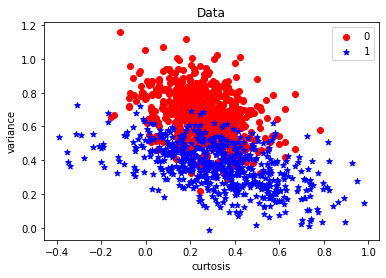

In [ ]:
import matplotlib.pyplot as plt

# Plot the synthetic dataset in order to visualize it

color =  {
    0: 'r',
    1: 'b',
}
marker = {
    0: 'o',
    1: '*'
}

plt.figure()
plt.title('Data')
for rec in [0,1]:
    plt.scatter(X[rec][:, 0], X[rec][:, 1], color=color[rec], marker=marker[rec], label=str(rec))
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.show()

### Dataset sintetico usando due feature selezionate

In [ ]:
#@title 
#@markdown KNN Parameters
maxK =  300#@param {type:"integer"}
nK = 50 #@param {type:"integer"}
plot_steps =  25#@param {type:"integer"}

Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]


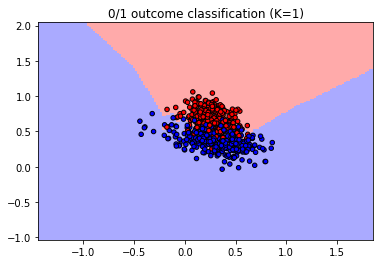

Performance for K = 1:  83.61%


Confusion matrix:
[[155  35]
 [ 25 151]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       190
         1.0       0.81      0.86      0.83       176

    accuracy                           0.84       366
   macro avg       0.84      0.84      0.84       366
weighted avg       0.84      0.84      0.84       366


Precision Score: 
0.8118279569892473


Validation MSE =  0.1639


Performance for K = 7:  86.61%


Confusion matrix:
[[160  30]
 [ 19 157]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       190
         1.0       0.84      0.89      0.87       176

    accuracy                           0.87       366
   macro avg       0.87      0.87      0.87       366
weighted avg       0.87      0.87      0.87       366


Precision Score: 
0.839572192513369


Validation MSE =  0.123


Performance for K = 13

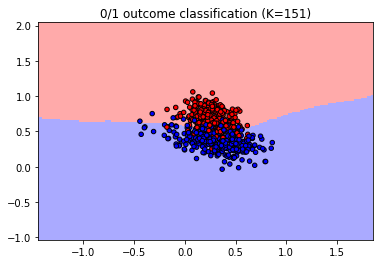

Performance for K = 151:  86.89%


Confusion matrix:
[[163  27]
 [ 21 155]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       190
         1.0       0.85      0.88      0.87       176

    accuracy                           0.87       366
   macro avg       0.87      0.87      0.87       366
weighted avg       0.87      0.87      0.87       366


Precision Score: 
0.8516483516483516


Validation MSE =  0.1189


Performance for K = 157:  86.61%


Confusion matrix:
[[163  27]
 [ 22 154]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       190
         1.0       0.85      0.88      0.86       176

    accuracy                           0.87       366
   macro avg       0.87      0.87      0.87       366
weighted avg       0.87      0.87      0.87       366


Precision Score: 
0.850828729281768


Validation MSE =  0.1189


Performance for K

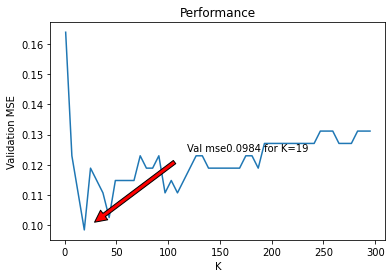


Best performance :  86.34% for K = 19


In [ ]:
"""
Addestramento, predizioni e ottimizzazione per il classificatore KNN sul dataset sintetico creato 
partendo dalle due features selezionate.
"""

KNN_tuning(XX[:N], YY[:N], maxK=maxK, nk=nK, plot_steps=plot_steps, comparison=True,
            best_K_plot_flag=True, plot_results_flag=True);

### Dataset reale usando 2 features selezionate

In [ ]:
#@title 
#@markdown KNN Parameters
maxK = 300 #@param {type:"integer"}
nK = 50 #@param {type:"integer"}
plot_steps =  25#@param {type:"integer"}


Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]


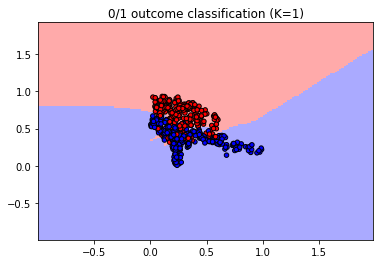

Performance for K = 1:  86.61%


Confusion matrix:
[[158  24]
 [ 25 159]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       182
         1.0       0.87      0.86      0.87       184

    accuracy                           0.87       366
   macro avg       0.87      0.87      0.87       366
weighted avg       0.87      0.87      0.87       366


Precision Score: 
0.8688524590163934


Validation MSE =  0.1148


Performance for K = 7:  89.34%


Confusion matrix:
[[156  26]
 [ 13 171]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       182
         1.0       0.87      0.93      0.90       184

    accuracy                           0.89       366
   macro avg       0.90      0.89      0.89       366
weighted avg       0.90      0.89      0.89       366


Precision Score: 
0.868020304568528


Validation MSE =  0.09836


Performance for K = 

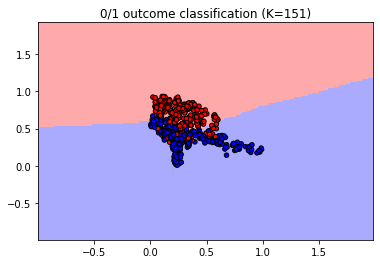

Performance for K = 151:  89.07%


Confusion matrix:
[[150  32]
 [  8 176]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       182
         1.0       0.85      0.96      0.90       184

    accuracy                           0.89       366
   macro avg       0.90      0.89      0.89       366
weighted avg       0.90      0.89      0.89       366


Precision Score: 
0.8461538461538461


Validation MSE =  0.127


Performance for K = 157:  89.34%


Confusion matrix:
[[151  31]
 [  8 176]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89       182
         1.0       0.85      0.96      0.90       184

    accuracy                           0.89       366
   macro avg       0.90      0.89      0.89       366
weighted avg       0.90      0.89      0.89       366


Precision Score: 
0.8502415458937198


Validation MSE =  0.127


Performance for K 

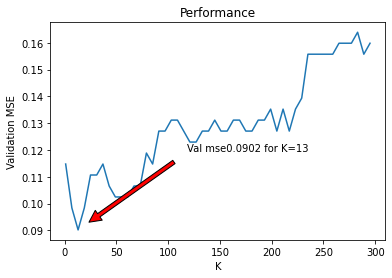


Best performance :  89.34% for K = 13


In [ ]:
import pandas as pd

"""
Addestramento, predizioni e ottimizzazione per il classificatore KNN sulle due features selezionate
dal dataset reale, .
"""

# viene ottenuto il dataset da utilizzare 
X_real = pd.concat([data[f1_name], data[f2_name]], axis=1)
Y_real = data['class'] # viene selezionata la feature su cui fare classificazione

KNN_tuning(X_real.values, Y_real.values, maxK=maxK, nk=nK,
           comparison=True, plot_steps=plot_steps, best_K_plot_flag=True, plot_results_flag=True);

### Dataset reale usando una feature alla volta

In [ ]:
#@title 
#@markdown KNN Parameters
maxK = 300 #@param {type:"integer"}
nK =  50#@param {type:"integer"}


***Fitting with 'variance' feature
Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  81.42%


Confusion matrix:
[[145  28]
 [ 40 153]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       173
         1.0       0.85      0.79      0.82       193

    accuracy                           0.81       366
   macro avg       0.81      0.82      0.81       366
weighted avg       0.82      0.81      0.81       366


Precision Score: 
0.8453038674033149


Validation MSE =  0.1967


Performance for K = 7:  86.07%


Confusion matrix:
[[144  29]
 [ 22 171]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       173
         1.0       0.85      0.89      0.87       19

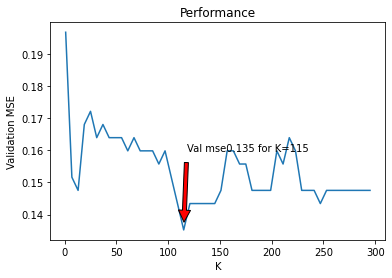


Best performance :  89.34% for K = 115

***Fitting with 'skewness' feature
Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  70.22%


Confusion matrix:
[[112  67]
 [ 42 145]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.73      0.63      0.67       179
         1.0       0.68      0.78      0.73       187

    accuracy                           0.70       366
   macro avg       0.71      0.70      0.70       366
weighted avg       0.71      0.70      0.70       366


Precision Score: 
0.6839622641509434


Validation MSE =  0.3197


Performance for K = 7:  74.59%


Confusion matrix:
[[131  48]
 [ 45 142]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       179
         1.0

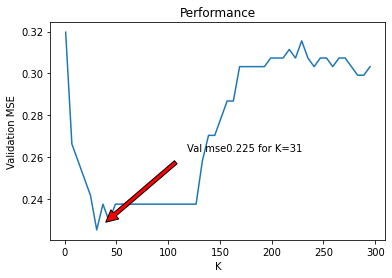


Best performance :  76.23% for K = 31

***Fitting with 'curtosis' feature
Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  56.01%


Confusion matrix:
[[109  61]
 [100  96]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.52      0.64      0.58       170
         1.0       0.61      0.49      0.54       196

    accuracy                           0.56       366
   macro avg       0.57      0.57      0.56       366
weighted avg       0.57      0.56      0.56       366


Precision Score: 
0.6114649681528662


Validation MSE =  0.418


Performance for K = 7:  57.92%


Confusion matrix:
[[125  45]
 [109  87]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.53      0.74      0.62       170
         1.0  

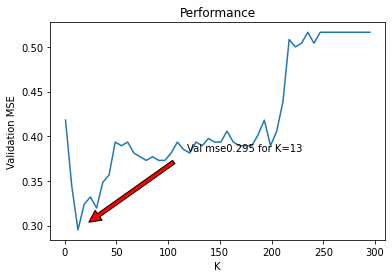


Best performance :  63.66% for K = 13

***Fitting with 'entropy' feature
Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  53.55%


Confusion matrix:
[[105  79]
 [ 91  91]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.54      0.57      0.55       184
         1.0       0.54      0.50      0.52       182

    accuracy                           0.54       366
   macro avg       0.54      0.54      0.53       366
weighted avg       0.54      0.54      0.53       366


Precision Score: 
0.5352941176470588


Validation MSE =  0.4631


Performance for K = 7:  51.91%


Confusion matrix:
[[103  81]
 [ 95  87]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54       184
         1.0  

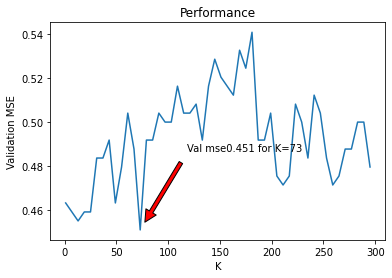


Best performance :  53.83% for K = 73
╒═══════╤════════════╤════════════╤════════════╤═══════════╕
│       │ variance   │ skewness   │ curtosis   │ entropy   │
╞═══════╪════════════╪════════════╪════════════╪═══════════╡
│ K     │ 115        │ 31         │ 13         │ 73        │
├───────┼────────────┼────────────┼────────────┼───────────┤
│ MSE   │ 13.52%     │ 22.54%     │ 29.51%     │ 45.08%    │
├───────┼────────────┼────────────┼────────────┼───────────┤
│ Score │ 89.34%     │ 76.23%     │ 63.66%     │ 53.83%    │
╘═══════╧════════════╧════════════╧════════════╧═══════════╛


In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np

"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di k con una festure per volta:
per ogni singola feature si ottiene il miglior k, il miglior MSE di validation e le migliori 
performance.
"""

# vengono inizializzati 3 vettori vuoti
best_k = []
best_mse = []
best_score = []


for feature in features: # per ogni feature
    X_real = pd.concat([data[feature]], axis=1)
    Y_real = data['class']

    print('\n ========================================================================================================================')
    print(f"***Fitting with '{feature}' feature") # per la feature selezionata
    
    k, mse, score = KNN_tuning(X_real.values, Y_real.values, maxK=maxK, nk=nK, # si ottiene il k che garantisce il miglior MSE, e le performance sul test set 
                                comparison=False, plot_steps=None, 
                                best_K_plot_flag=True, plot_results_flag=True) 
    
    # vengono aggiunti ai vettori
    best_k.append(k)
    best_mse.append(mse)
    best_score.append(score)

# si ottiene una tabella che riporta per ogni feature i migliori valori ottenuti.

table = tabulate(np.array([['K'] + [f'{k}' for k in best_k],
                           ['MSE'] + [f'{mse*100:.2f}%' for mse in best_mse],
                           ['Score'] + [f'{score*100:.2f}%' for score in best_score]]),
                 features, tablefmt="fancy_grid")
print(table)

### Dataset reale usando tutte le features assieme

In [ ]:
#@title 
#@markdown KNN Parameters
maxK = 300 #@param {type:"integer"}
nK = 50 #@param {type:"integer"}

Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  100.00%


Confusion matrix:
[[181   0]
 [  0 185]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       181
         1.0       1.00      1.00      1.00       185

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366


Precision Score: 
1.0


Validation MSE =  0.004098


Performance for K = 7:  98.63%


Confusion matrix:
[[176   5]
 [  0 185]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       181
         1.0       0.97      1.00      0.99       185

    accuracy                           0.99  

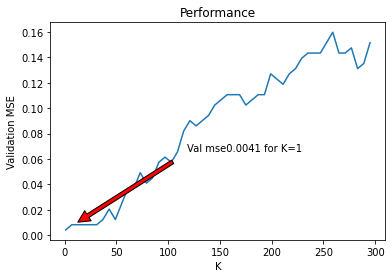


Best performance :  100.00% for K = 1


In [ ]:
import pandas as pd

"""
Vengono effettuati addestramento, predizioni e ottimizzazione di k utilizzando tutte le features 
nel dataset, ad eccezione di class, usata come classe da predirre.
"""
X_real = pd.concat([data[feature] for feature in features], axis=1)
Y_real = data['class']

KNN_tuning(X_real.values, Y_real.values, maxK=maxK, nk=nK, comparison=True,
           plot_steps=None, best_K_plot_flag=True, plot_results_flag=True);

### Dataset sintetico usando tutte le features assieme

In [ ]:
#@title 
#@markdown KNN Parameters
maxK = 300 #@param {type:"integer"}
nK = 50 #@param {type:"integer"}

Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  99.04%


Confusion matrix:
[[350   3]
 [  4 375]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       353
         1.0       0.99      0.99      0.99       379

    accuracy                           0.99       732
   macro avg       0.99      0.99      0.99       732
weighted avg       0.99      0.99      0.99       732


Precision Score: 
0.9920634920634921


Validation MSE =  0.006148


Performance for K = 7:  99.04%


Confusion matrix:
[[347   6]
 [  1 378]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       353
         1.0       0.98      1.00      0.99       379

    accuracy                   

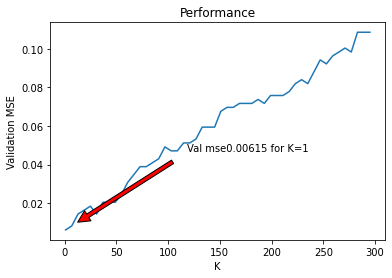


Best performance :  99.04% for K = 1


In [ ]:
"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di k sul dataset sintetico 
otenuto partendo da tutte le feature.

N.B. Il numero di campioni nel dataset sintetico può essere variato a piacimento, andando a modificare 
il moltiplicatore nell'apposito form.

"""
KNN_tuning(XX_full[:N*2], YY_full[:N*2], maxK=maxK, nk=nK, comparison=True, plot_steps=None,
            best_K_plot_flag=True, plot_results_flag=True);

Trying for K=[  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199 205 211
 217 223 229 235 241 247 253 259 265 271 277 283 289 295]
Performance for K = 1:  99.64%


Confusion matrix:
[[517   2]
 [  2 577]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       519
         1.0       1.00      1.00      1.00       579

    accuracy                           1.00      1098
   macro avg       1.00      1.00      1.00      1098
weighted avg       1.00      1.00      1.00      1098


Precision Score: 
0.9965457685664939


Validation MSE =  0.01093


Performance for K = 7:  99.18%


Confusion matrix:
[[511   8]
 [  1 578]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       519
         1.0       0.99      1.00      0.99       579

    accuracy                    

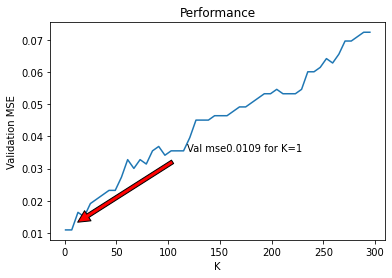


Best performance :  99.64% for K = 1


In [ ]:
KNN_tuning(XX_full[:N*3], YY_full[:N*3], maxK=maxK, nk=nK, comparison=True, plot_steps=None,
            best_K_plot_flag=True, plot_results_flag=True);

# 6 Naïve-Kernel

## 6.1 Funzioni utili per Sparks

In [ ]:
from math import sqrt
import numpy as np
import heapq

def euclidean_distance(yx_train):
    """
    Questa funzione viene utilizzata da Spark per calcolare la distanza euclidea tra il valore 
    x di test mandato in broadcast e quello passato come parametro. Questa funzione viene chiamata 
    quando il cluster cerca i vicini in un range. 
    """
    global x_test_br
    x_train = yx_train[1:] 

    distance = 0.0

    for i in range(len(x_train)):
        distance += (x_train[i] - x_test_br.value[i])**2
    return sqrt(distance)


def neighbors_in_h(collection):
    """
    Questa funzione viene utilizzata da spark per ottenere i valori che si trovano in un range fissato, 
    calcolando la distanza euclidea dato un certo punto
    """

    global h_br
    return np.array(list(filter(lambda x: euclidean_distance(x) <= h_br.value, collection)))


## 6.2 Funzioni di Fit e Predict per Naïve-Kernel

In [ ]:
import numpy as np
from numpy.random import randint
from operator import add
from sklearn.metrics import mean_squared_error

def NaiveKernel_fit_and_predict(h, XX_train, XX_test, YY_train):
    """
    Questa funzione effettua l'addestramento e la predizione di una y utilizzando spark: per ogni x
    nel test set viene determinata la distanza euclidea dai punti del training set, e vengono selezionati 
    quelli che sono al di sotto di una certa soglia.
    Il dataset viene parallelizzato. Il valore h viene mandato in broadcast a tutti i cluster, così
    come, il valore di x, del test set, selezionato.
    Le stesse labels ottenute vengono parallelizzate e passate a spark per computare il numero di 1
    presenti: nel caso questi superano la metà del numero effettivo di labels, la classe sarà 1.
    """

    # viene creato il dataset
    YY__XX_train = np.column_stack((YY_train, XX_train))
    
    # il dataset viene parallelizzato
    rdd = sc.parallelize(YY__XX_train).cache()
    
    # broadcast h
    global h_br
    h_br = sc.broadcast(h)

    YY_estimated = []

    for x_test in XX_test:
      # broadcast x di test
      global x_test_br
      x_test_br = sc.broadcast(x_test)

      # ricerca dei vicini di x_test che sono al di sotto della soglia h
      neighbors = rdd.mapPartitions(neighbors_in_h).collect()
      labels = [x[0] for x in neighbors]

      if len(labels) > 0:
          # parallelizzazione delle labels
          neighbors_rdd = sc.parallelize(labels).cache()

          # calcolo del numero di 1 in ogni partizione 
          total_ones = neighbors_rdd.reduce(add)

          # stima della classe sulla base del numero di 1
          YY_estimated.append(int(total_ones > len(neighbors)/2))
      else:
          YY_estimated.append(randint(0,1))

    return np.array(YY_estimated)



def NaiveKernel(h, XX_train, XX_test, YY_train, YY_test):
    """
    Effettua l'addestramento e la predizione sul dataset passato, e calcola le performance e mse
    """
    YY_estimated = NaiveKernel_fit_and_predict(h, XX_train, XX_test, YY_train)
    YY_test = YY_test.flatten()

    score = sum(YY_estimated == YY_test) / len(YY_test) # calcoliamo il numero di labels stimate uguali alle labels di test e dividiamo per la lunghezza
    mse = mean_squared_error(YY_estimated, YY_test) # calcolo dell'MSE tra Y stimate e Y di test.

    return score, mse

## 6.3 Funzione di plot per Naïve-Kernel

In [ ]:
#@title 
#@markdown Naïve-Kernel Parameters
step_size_mesh =  0.09#@param {type:"number"}

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def Naive_kernel_plot(h, XX_train, YY_train):

    """
    Effettua la stampa della predizione usando il valore h passato. 
    Viene ottenuta una meshgrid, partendo dai valori massimi e minimi di XX e YY passati. Vengono fatte
    delle predizioni sui valori di questa meshgrid, utilizzando il modello realizzato. Infine, i 
    risultati sono graficati. 
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    ss = step_size_mesh # step size per la meshgrid. Il parametro può essere settato nel form superiore
        
    x_min, x_max = XX_train[:, 0].min() - 1, XX_train[:, 0].max() + 1
    y_min, y_max = XX_train[:, 1].min() - 1, XX_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, ss), np.arange(y_min, y_max, ss)) # viene ottenuta la meshgrid

    Z = NaiveKernel_fit_and_predict(h, XX_train, np.c_[xx.ravel(), yy.ravel()], YY_train,)

    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light) 

    # vengono rappresentati anche i punti del training set
    plt.scatter(XX_train[:, 0], XX_train[:, 1], c=YY_train, cmap=cmap_bold, edgecolor='k', s=20)   
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"0/1 outcome classification (h ={h: .4f})")
    plt.show()

## 6.4 Funzione di Threshold-tuning per Naïve-Kernel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def NaiveKernel_tuning(XX, YY, minh=0.2, maxh=0.5, nh=10, test_size=0.3, val_size=0.2, best_h_plot_flag=False, plot_results_flag=True, plot_flag=False):
    
    """
    Effettua l'ottimizzazione del parametro di soglia h. 
    Il dataset viene diviso in 3 parti: train, validation e test set.
    Si ottiene un vettore di h da testare, partendo da minh e maxh, andando ad individuare nh valori 
    in questo range. Per ogni h, vengono calcolati performance e MSE sia sul test set che sul 
    validation set. A questo punto, viene scelto h che minimizza l'MSE sul validation set, e si 
    graficano tutti i risultati ottenuti per quel valore di h.
    """

    # il dataset viene diviso in 3 parti.
    XX_train, XX_test, XX_val, YY_train, YY_test, YY_val = train_test_val_split(XX, YY, test_size, val_size)
    
    mses_val = {}
    perf_val = {}

    mses_test = {}
    perf_test = {}

    # viene ottenuto uno step value per la scelta delle h da usare per l'ottimizzazione
    range_value = ((maxh-minh)/nh)
    hh = np.round(np.arange(start=minh, stop=maxh, step=range_value, dtype=np.float32), 4) # otteniamo nh valori tra minh e maxh

    if plot_results_flag:
        print(f'Trying for h ={hh}')
        print('========================================================================================================================\n')


    for i in range(len(hh)): # per ogni h in hh
        h = hh[i]

        perf_val[h], mses_val[h] = NaiveKernel(h, XX_train, XX_val, YY_train, YY_val) # calcolo delle preformance e dell'MSE sul validation set
        perf_test[h], mses_test[h] = NaiveKernel(h, XX_train, XX_test, YY_train, YY_test) # calcolo delle preformance e dell'MSE sul test set
        
        if plot_results_flag:
            print(f"For h = {h: .4f}, Validation MSE ={mses_val[h]: .4}, Test performance = {perf_test[h]*100: .2f}%, Test MSE = {mses_test[h]: .4f}\n")

    best_h = min(mses_val, key=mses_val.get) # viene trovato h che garantisce il più basso MSE sul validation set
    best_mse = mses_val[best_h]  # viene selezionato il valore dell'MSE di validation per h scelto

    # sono selezionati le performance e l'MSE sul test set in corrispondenza di h
    test_perf = perf_test[best_h] 
    test_mse = mses_test[best_h]
    
    
    if best_h_plot_flag:
        if plot_flag:
          Naive_kernel_plot(best_h, XX_train, YY_train) 

        # viene graficato il validation MSE in funzione di h
        plt.figure()
        plt.plot(hh, list(mses_val.values()))
        plt.xlabel('h')
        plt.ylabel('Validation MSE')
        plt.title("Performance")      
        r = (min(mses_val.values()), max(list(mses_val.values())))

        plt.annotate(f'{best_mse:.3} for h={best_h: .4f}', xy=(best_h, best_mse),
                    xytext=(0.4*max(hh), r[0] + 0.4*(r[1]- r[0])),
                    arrowprops=dict(facecolor='red', headwidth=12, shrink=0.1))
        plt.show()

    if plot_results_flag:
        print('\n========================================================================================================================')
        print(f"Test performance:{test_perf * 100: .2f}% and Test MSE:{test_mse: .4f} for h ={best_h: .4f}")
    
    return best_h, best_mse, test_perf, test_mse

## 6.5 Risultati

### Dataset sintetico usando due features selezionate

In [ ]:
#@title 
#@markdown Parametri Naïve-Kernel
minh = 0.01 #@param {type:"number"}
maxh =  0.5#@param {type:"number"}
nh =  12#@param {type:"integer"}

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.4221, Test performance =  58.74%, Test MSE =  0.4126

For h =  0.0508, Validation MSE = 0.1762, Test performance =  81.69%, Test MSE =  0.1831

For h =  0.0917, Validation MSE = 0.1639, Test performance =  86.07%, Test MSE =  0.1393

For h =  0.1325, Validation MSE = 0.1434, Test performance =  87.43%, Test MSE =  0.1257

For h =  0.1733, Validation MSE = 0.1434, Test performance =  87.70%, Test MSE =  0.1230

For h =  0.2142, Validation MSE = 0.1393, Test performance =  87.16%, Test MSE =  0.1284

For h =  0.2550, Validation MSE = 0.1434, Test performance =  86.89%, Test MSE =  0.1311

For h =  0.2958, Validation MSE = 0.1557, Test performance =  86.34%, Test MSE =  0.1366

For h =  0.3367, Validation MSE = 0.1557, Test performance =  85.79%, Test MSE =  0.1421

For h =  0.3775, Validation MSE = 0.168, Test performance =  85.25%, Test MSE =  0.1475


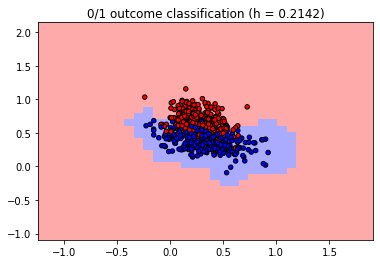

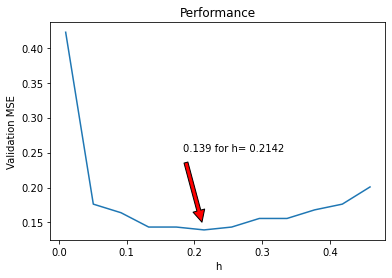


Test performance: 87.16% and Test MSE: 0.1284 for h = 0.2142


In [ ]:
"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di h sul dataset sintetico
contenete campioni generati partendo dalle due features selezionate 
"""
NaiveKernel_tuning(XX[:N], YY[:N], minh=minh, maxh=maxh, nh=nh,
                   test_size=0.3, val_size=0.2,
                   best_h_plot_flag=True, plot_results_flag=True, plot_flag=True);

### Dataset reale usando 2 features selezionate

In [ ]:
#@title 
#@markdown Naïve-Kernel Parameters
minh = 0.01 #@param {type:"number"}
maxh =  0.5#@param {type:"number"}
nh =  12#@param {type:"integer"}

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.2828, Test performance =  72.40%, Test MSE =  0.2760

For h =  0.0508, Validation MSE = 0.123, Test performance =  90.71%, Test MSE =  0.0929

For h =  0.0917, Validation MSE = 0.1393, Test performance =  90.98%, Test MSE =  0.0902

For h =  0.1325, Validation MSE = 0.1311, Test performance =  90.71%, Test MSE =  0.0929

For h =  0.1733, Validation MSE = 0.1475, Test performance =  89.62%, Test MSE =  0.1038

For h =  0.2142, Validation MSE = 0.1516, Test performance =  87.43%, Test MSE =  0.1257

For h =  0.2550, Validation MSE = 0.1516, Test performance =  86.89%, Test MSE =  0.1311

For h =  0.2958, Validation MSE = 0.1557, Test performance =  87.16%, Test MSE =  0.1284

For h =  0.3367, Validation MSE = 0.168, Test performance =  85.79%, Test MSE =  0.1421

For h =  0.3775, Validation MSE = 0.1926, Test performance =  82.79%, Test MSE =  0.1721



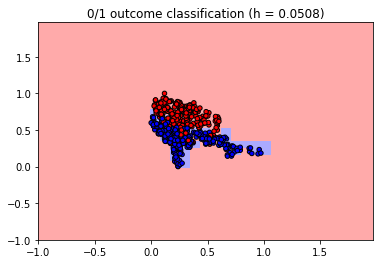

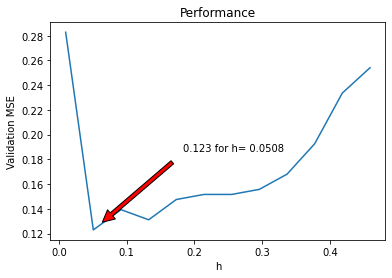


Test performance: 90.71% and Test MSE: 0.0929 for h = 0.0508


In [ ]:
import pandas as pd

"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di h sul dataset reale
contenete campioni dalle due features selezionate 
"""

X_real = pd.concat([data[f1_name], data[f2_name]], axis=1) # vengono selezionate le due feature dal dataset e concatenate
Y_real = data['class'] # class è usata per la classificazione

NaiveKernel_tuning(X_real[:N].values, Y_real[:N].values,
                   minh=minh, maxh=maxh, nh=nh, best_h_plot_flag=True, plot_results_flag=True, plot_flag=True);

### Dataset reale usando una feature alla volta

In [ ]:
#@title 
#@markdown Naïve-Kernel Parameters
minh = 0.01 #@param {type:"number"}
maxh =  0.5#@param {type:"number"}
nh =  12#@param {type:"integer"}

***Fitting with 'variance' feature 

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.1639, Test performance =  83.88%, Test MSE =  0.1612

For h =  0.0508, Validation MSE = 0.1598, Test performance =  83.88%, Test MSE =  0.1612

For h =  0.0917, Validation MSE = 0.1434, Test performance =  83.06%, Test MSE =  0.1694

For h =  0.1325, Validation MSE = 0.1516, Test performance =  83.33%, Test MSE =  0.1667

For h =  0.1733, Validation MSE = 0.1516, Test performance =  83.61%, Test MSE =  0.1639

For h =  0.2142, Validation MSE = 0.1475, Test performance =  83.33%, Test MSE =  0.1667

For h =  0.2550, Validation MSE = 0.1475, Test performance =  83.61%, Test MSE =  0.1639

For h =  0.2958, Validation MSE = 0.1598, Test performance =  83.88%, Test MSE =  0.1612

For h =  0.3367, Validation MSE = 0.1639, Test performance =  83.61%, Test MSE =  0.1639

For h =  0.3775, Validation MSE = 0.1557, Test perf

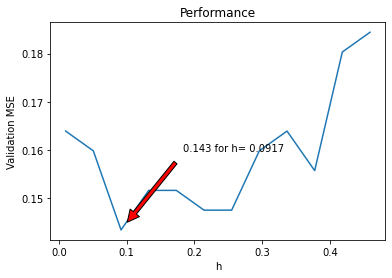


Test performance: 83.06% and Test MSE: 0.1694 for h = 0.0917
***Fitting with 'skewness' feature 

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.2664, Test performance =  77.87%, Test MSE =  0.2213

For h =  0.0508, Validation MSE = 0.2459, Test performance =  78.42%, Test MSE =  0.2158

For h =  0.0917, Validation MSE = 0.2459, Test performance =  78.96%, Test MSE =  0.2104

For h =  0.1325, Validation MSE = 0.3443, Test performance =  71.04%, Test MSE =  0.2896

For h =  0.1733, Validation MSE = 0.3402, Test performance =  72.40%, Test MSE =  0.2760

For h =  0.2142, Validation MSE = 0.3607, Test performance =  70.22%, Test MSE =  0.2978

For h =  0.2550, Validation MSE = 0.4139, Test performance =  66.67%, Test MSE =  0.3333

For h =  0.2958, Validation MSE = 0.4221, Test performance =  66.39%, Test MSE =  0.3361

For h =  0.3367, Validation MSE = 0.4221, Test performance =  65.85%, Test MSE 

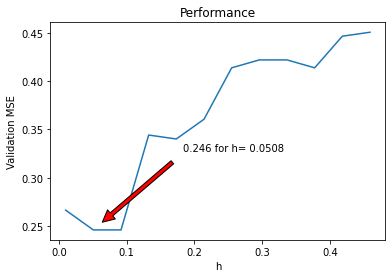


Test performance: 78.42% and Test MSE: 0.2158 for h = 0.0508
***Fitting with 'curtosis' feature 

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.3443, Test performance =  60.93%, Test MSE =  0.3907

For h =  0.0508, Validation MSE = 0.3975, Test performance =  57.92%, Test MSE =  0.4208

For h =  0.0917, Validation MSE = 0.4344, Test performance =  53.01%, Test MSE =  0.4699

For h =  0.1325, Validation MSE = 0.4303, Test performance =  53.01%, Test MSE =  0.4699

For h =  0.1733, Validation MSE = 0.4426, Test performance =  52.73%, Test MSE =  0.4727

For h =  0.2142, Validation MSE = 0.4426, Test performance =  52.73%, Test MSE =  0.4727

For h =  0.2550, Validation MSE = 0.4426, Test performance =  54.10%, Test MSE =  0.4590

For h =  0.2958, Validation MSE = 0.4385, Test performance =  53.55%, Test MSE =  0.4645

For h =  0.3367, Validation MSE = 0.4549, Test performance =  52.19%, Test MSE 

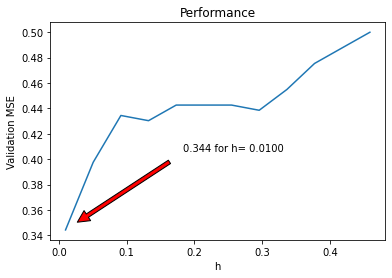


Test performance: 60.93% and Test MSE: 0.3907 for h = 0.0100
***Fitting with 'entropy' feature 

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.4713, Test performance =  50.00%, Test MSE =  0.5000

For h =  0.0508, Validation MSE = 0.5123, Test performance =  48.36%, Test MSE =  0.5164

For h =  0.0917, Validation MSE = 0.5082, Test performance =  51.91%, Test MSE =  0.4809

For h =  0.1325, Validation MSE = 0.5123, Test performance =  51.37%, Test MSE =  0.4863

For h =  0.1733, Validation MSE = 0.5246, Test performance =  51.09%, Test MSE =  0.4891

For h =  0.2142, Validation MSE = 0.5369, Test performance =  49.73%, Test MSE =  0.5027

For h =  0.2550, Validation MSE = 0.5246, Test performance =  47.27%, Test MSE =  0.5273

For h =  0.2958, Validation MSE = 0.5164, Test performance =  46.45%, Test MSE =  0.5355

For h =  0.3367, Validation MSE = 0.5246, Test performance =  47.54%, Test MSE =

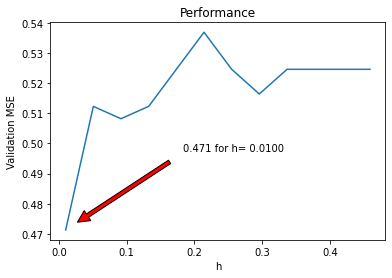


Test performance: 50.00% and Test MSE: 0.5000 for h = 0.0100
╒════════════════╤════════════════════╤═════════════════════╤══════════════════════╤══════════════════════╕
│                │ variance           │ skewness            │ curtosis             │ entropy              │
╞════════════════╪════════════════════╪═════════════════════╪══════════════════════╪══════════════════════╡
│ h              │ 0.0917000025510788 │ 0.05079999938607216 │ 0.009999999776482582 │ 0.009999999776482582 │
├────────────────┼────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ Validation MSE │ 14.34%             │ 24.59%              │ 34.43%               │ 47.13%               │
├────────────────┼────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ Test Score     │ 83.06%             │ 78.42%              │ 60.93%               │ 50.00%               │
├────────────────┼────────────────────┼─────────────────────┼─────────────

In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np

"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di h utilizzando una singola
feature per volta, dal dataset reale.
Viene realizzata una tabella che riporta tutti i risultati ottenuti.
"""
best_h = []
best_mse = []
test_score = []
test_mse = []

for feature in features:
    X_real = pd.concat([data[feature]], axis=1)
    Y_real = data['class']

    print(f"***Fitting with '{feature}' feature \n")
    h, mse, t_score, t_mse = NaiveKernel_tuning(X_real[:N].values, Y_real[:N].values,
                                       minh=minh, maxh=maxh, nh=nh,
                                       best_h_plot_flag=True, plot_results_flag=True, plot_flag=False)
    best_h.append(h)
    best_mse.append(mse)
    test_score.append(t_score)
    test_mse.append(t_mse)

table = tabulate(np.array([['h'] + [f'{h}' for h in best_h],
                           ['Validation MSE'] + [f'{mse*100:.2f}%' for mse in best_mse],
                           ['Test Score'] + [f'{score*100:.2f}%' for score in test_score],
                           ['Test MSE'] + [f'{mse*100:.2f}%' for mse in test_mse]]),
                 features, tablefmt="fancy_grid")
print(table)

### Dataset reale usando tutte le features assieme

In [ ]:
#@title 
#@markdown Naïve-Kernel Parameters
minh = 0.01 #@param {type:"number"}
maxh =  0.5#@param {type:"number"}
nh =  12#@param {type:"integer"}

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.4918, Test performance =  55.46%, Test MSE =  0.4454

For h =  0.0508, Validation MSE = 0.03279, Test performance =  93.99%, Test MSE =  0.0601

For h =  0.0917, Validation MSE = 0.01639, Test performance =  98.91%, Test MSE =  0.0109

For h =  0.1325, Validation MSE = 0.0123, Test performance =  99.45%, Test MSE =  0.0055

For h =  0.1733, Validation MSE = 0.0123, Test performance =  99.45%, Test MSE =  0.0055

For h =  0.2142, Validation MSE = 0.01639, Test performance =  99.18%, Test MSE =  0.0082

For h =  0.2550, Validation MSE = 0.02049, Test performance =  97.27%, Test MSE =  0.0273

For h =  0.2958, Validation MSE = 0.04098, Test performance =  94.81%, Test MSE =  0.0519

For h =  0.3367, Validation MSE = 0.05738, Test performance =  94.26%, Test MSE =  0.0574

For h =  0.3775, Validation MSE = 0.06148, Test performance =  91.80%, Test MSE = 

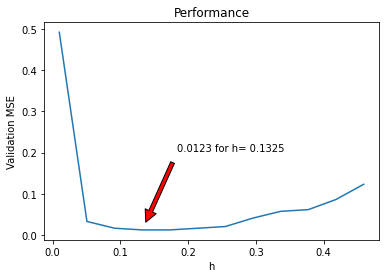


Test performance: 99.45% and Test MSE: 0.0055 for h = 0.1325


In [ ]:
import pandas as pd
import numpy as np

"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di h utilizzando tutte le features
insieme.
"""

X_real = pd.concat([data[feature] for feature in features], axis=1)
Y_real = data['class']

NaiveKernel_tuning(X_real[:N].values, Y_real[:N].values,
                   minh=minh, maxh=maxh, nh=nh,
                   best_h_plot_flag=True, plot_results_flag=True, plot_flag=False);

### Dataset sintetico usando tutte le features assieme

In [ ]:
#@title 
#@markdown Naïve-Kernel Parameters
minh = 0.01 #@param {type:"number"}
maxh =  0.5#@param {type:"number"}
nh =  12#@param {type:"integer"}

Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.4877, Test performance =  48.63%, Test MSE =  0.5137

For h =  0.0508, Validation MSE = 0.291, Test performance =  69.40%, Test MSE =  0.3060

For h =  0.0917, Validation MSE = 0.06762, Test performance =  93.99%, Test MSE =  0.0601

For h =  0.1325, Validation MSE = 0.01844, Test performance =  97.13%, Test MSE =  0.0287

For h =  0.1733, Validation MSE = 0.01639, Test performance =  97.13%, Test MSE =  0.0287

For h =  0.2142, Validation MSE = 0.02254, Test performance =  96.17%, Test MSE =  0.0383

For h =  0.2550, Validation MSE = 0.03279, Test performance =  95.49%, Test MSE =  0.0451

For h =  0.2958, Validation MSE = 0.05533, Test performance =  93.31%, Test MSE =  0.0669

For h =  0.3367, Validation MSE = 0.07992, Test performance =  90.71%, Test MSE =  0.0929

For h =  0.3775, Validation MSE = 0.1148, Test performance =  88.66%, Test MSE =  

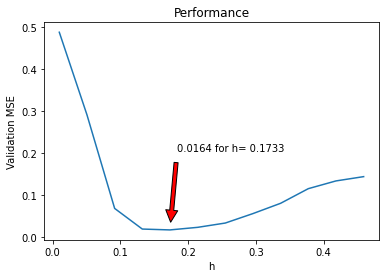


Test performance: 97.13% and Test MSE: 0.0287 for h = 0.1733


In [ ]:
"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di h a partire dal dataset sintetico
generato dalle stime su tutte le features.
"""

NaiveKernel_tuning(XX_full[:N*2], YY_full[:N*2], minh=minh, maxh=maxh, nh=nh,
                   test_size=0.3, val_size=0.2,
                   best_h_plot_flag=True, plot_results_flag=True, plot_flag=False);

In [ ]:
print(len(XX))
print(len(YY))
print(len(XX_full))
print(len(YY_full))

1220
1220
14640
14640


Trying for h =[0.01   0.0508 0.0917 0.1325 0.1733 0.2142 0.255  0.2958 0.3367 0.3775
 0.4183 0.4592]

For h =  0.0100, Validation MSE = 0.5178, Test performance =  50.09%, Test MSE =  0.4991

For h =  0.0508, Validation MSE = 0.2705, Test performance =  74.32%, Test MSE =  0.2568

For h =  0.0917, Validation MSE = 0.04918, Test performance =  94.08%, Test MSE =  0.0592

For h =  0.1325, Validation MSE = 0.01093, Test performance =  97.63%, Test MSE =  0.0237

For h =  0.1733, Validation MSE = 0.006831, Test performance =  97.63%, Test MSE =  0.0237

For h =  0.2142, Validation MSE = 0.01913, Test performance =  97.27%, Test MSE =  0.0273

For h =  0.2550, Validation MSE = 0.03552, Test performance =  96.54%, Test MSE =  0.0346

For h =  0.2958, Validation MSE = 0.05055, Test performance =  94.08%, Test MSE =  0.0592

For h =  0.3367, Validation MSE = 0.0765, Test performance =  92.35%, Test MSE =  0.0765

For h =  0.3775, Validation MSE = 0.09973, Test performance =  89.71%, Test MSE =

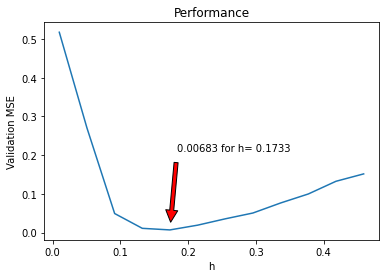


Test performance: 97.63% and Test MSE: 0.0237 for h = 0.1733


In [ ]:
"""
Vengono effettuati l'addestramento, le predizioni e l'ottimizzazione di h a partire dal dataset sintetico
generato dalle stime su tutte le features.
"""

NaiveKernel_tuning(XX_full[:N*3], YY_full[:N*3], minh=minh, maxh=maxh, nh=nh,
                   test_size=0.3, val_size=0.2,
                   best_h_plot_flag=True, plot_results_flag=True, plot_flag=False);

# 7 Regressione Logistica

## 7.1 Funzioni utili per Sparks

In [ ]:
# è usata da spark per aggregare i risultati su ogni partizione 
def addition(x, y):
  return x + y


def sigmoid(x):

    return 1 / (1 + np.exp(-x))


def LogReg_gradient(v):

    """
    Ritorna il gradiente su un singolo punto del training set.
    """
    x = v[1:]                 
    y = -1 + 2 * v[0]
    
    w_dot_x = (w_br.value @ x.T)    

    return - y * (1 - sigmoid(y * w_dot_x)) * x


def compute_cost(X, Y, w):

    """
    Da in output il valore di costo, calcolato rispetto al dataset X, il peso corrente w e le labels 
    attuali
    """
    s = sigmoid(X @ w)
    cost = (- 1 / len(Y)) * (((Y).T @ np.log(s)) + ((1 - Y).T @ np.log(1 - s)))
    return cost


def gradient_descent_spark(YY_XX_train, w, iterations=2000, learning_rate=0.3, momentum=0.03):
    
    """
    Performa l'algoritmo del gradient descent usando spark, e ritorna i costi per ogni iterazione,
    ed il peso w. Oltre al learning_rate, può essere settato anche un valore per il momentum

    """
    RDD_train = sc.parallelize(YY_XX_train).cache() # parallelizzazione del dataset
    global w_br

    costs = np.zeros((iterations,1)) #

    for i in range(iterations):
        gradient = RDD_train.map(LogReg_gradient).reduce(addition) # calcolo del gradient descent
        w = w - learning_rate * (gradient/(N//2) + momentum * w) # aggiornamento dei pesi
        w_br = sc.broadcast(w)
        costs[i] = compute_cost(YY_XX_train[:, 1:], YY_XX_train[:, 0].reshape(len(YY_XX_train), 1), w.reshape(len(w), 1)) # calcolo dei costi

    return costs, w


def predict_spark(X, w):
    """
    Calcolo della P(1|X) o P(0|X)
    """
    return np.round(sigmoid(X @ w.reshape(len(w), 1)))

def score_spark(YY_pred, YY_test):
    """
    Ritorna la percentuale di t predette in maniera corretta 
    """
    s = float(sum(YY_pred == YY_test))
    l = float(len(YY_test))
    return (s / l)
  

## 7.2 Funzioni di Fit e Predict per la Regressione Logistica con Spark

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def logistic_regression_spark(XX_train, XX_test, YY_train, YY_test, iterations=100, learning_rate=0.02, momentum=0.002, plot_flag=True, plot_results_flag=True):
  
  """
  Calcola la regressione logistica utilizzando gli algoritmi precedentemente descritti. Effettua il
  calcolo dei costi, e l'aggiornamento dei pesi per un numero di volte specificato dal parametro 
  iterations. Successivamente effettua la predizione in funzione dei pesi trovati e delle x di test.
  Inoltre effettua il plot delle funzione di costo, in relazione con il numero di iterazioni.
  Infine sono stampate le performances.  
  """

  # viene aggiunta una colonna contenente tutti 1. Questo perchè tra i parametri abbiamo w0 (beta 0)
  # che rappresenta l'intercetta.
  XX_train_ones = np.hstack((np.ones((len(XX_train),1)), XX_train)) 
  XX_test = np.hstack((np.ones((len(XX_test),1)), XX_test))

  YY_XX_train = np.column_stack( (YY_train, XX_train_ones) )

  global w_br

  w = np.zeros((np.size(XX_train_ones, 1), 1)).flatten() # viene inizializzato il vettore dei tutto a 0
  w_br = sc.broadcast(w) # viene mandato in bradcast a tutti i cluster

  costs, w_hat = gradient_descent_spark(YY_XX_train, w,  iterations=iterations, learning_rate=learning_rate, momentum=momentum) # applichiamo l'algoritmo

  if plot_flag:
    print('=======================\n USING SPARK\n=======================\n')
    
    # stampa della funzione di costo in relazione con le iterazioni
    plt.figure()
    plt.plot(range(len(costs)), costs, 'r')
    plt.title("Cost Function")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()

    # vengono graficati i punti del training set, insieme alle regioni di decisone

    f = plt.figure()
    plt.title('Training set and the learned sigmoid using SPARK')

    # stampa dei punti del training set
    plt.scatter(XX_train[:, 0], XX_train[:, 1], c=YY_train, cmap='RdBu', zorder=2)
    
    # Dato w, viene realizzato il countour plot utilizzando la funzione sigmoide 1/(1+e^(-w[0]-w[1]*x-w[2]*y))
    # viene realizzata una meshgrid

    # step 1: vengono ottenuti i confini del grafo 
    ax = plt.gca(); xlim = ax.get_xlim(); ylim = ax.get_ylim();

    # step 2: viene creata la griglia 
    yy, xx = np.meshgrid(np.linspace(ylim[0], ylim[1], 30), np.linspace(xlim[0], xlim[1], 30))

    # step 3: viene calcolata ala sigmoide per ogni punto della griglia
    pp = np.divide(1, 1 + np.exp(- w_hat[0] - w_hat[1]*xx - w_hat[2]*yy ) ); 
    
    # step 4: stampa dei confini decisionali
    contour = ax.contourf(xx, yy, pp, 25, cmap="RdBu", alpha=0.6, levels=[0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9, 1], zorder=0)
    f.colorbar(contour)


  if plot_results_flag:
    y_pred = predict_spark(XX_test, w_hat) # effettuo la predizione 

    performance = score_spark(y_pred, YY_test) # calcolo le performance
    print('\n========================================================================================================================')
    print(f"Performance using SPARK: {performance * 100: .2f}% \n\n")


## 7.3 Funzioni di Fit e Predict per la Regressione Logistica senza Spark

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier


def logistic_regression(XX_train, XX_test, YY_train, YY_test, plot_flag=False, plot_results_flag=True):

    """
    Calcolo della regressione logistica utilizzando le funzioni di libreria. In particolare viene 
    utilizzato l'algoritmo SGD: quindi l'ottimizzazione dei pesi viene fatta usando un singolo campione 
    per volta. Si effettua l'addestramento e la predizione. Infine vengono plottate le regioni di 
    decisione e le performance.
    """
    
    lr = SGDClassifier('log') # if SGD is not needed, use LogisticRegression instead
    lr.fit(XX_train, YY_train)
    YY_estimated = lr.predict(XX_test)

    performance = lr.score(XX_test, YY_test)


    if plot_flag:
        print('=======================\n NO SPARK \n=======================')
        f = plt.figure()
        plt.title('Training set and the learned sigmoid without SPARK')

        # vengono graficati i punti del training set, insieme alle regioni di decisone

        # stampa dei punti del training set
        plt.scatter(XX_train[:, 0], XX_train[:, 1], c=YY_train, cmap='RdBu', zorder=2)         

        # Dato w, viene realizzato il countour plot utilizzando la funzione sigmoide 1/(1+e^(-w[0]-w[1]*x-w[2]*y))
        # viene realizzata una meshgrid

        # step 1: vengono ottenuti i confini del grafo 
        ax = plt.gca(); xlim = ax.get_xlim(); ylim = ax.get_ylim();

        # step 2: viene creata la griglia 
        yy, xx = np.meshgrid(np.linspace(ylim[0], ylim[1], 50), np.linspace(xlim[0], xlim[1], 50))

        # step 3: impilo la griga 
        xx_yy = np.vstack([xx.ravel(), yy.ravel()]).T

        # step 4: faccio predizione per i valori della meshgrid
        pp = lr.predict_proba(xx_yy)[:, 1].reshape(xx.shape)

        # step 5: stampa dei confini decisionali
        contour = ax.contourf(xx, yy, pp, 25, cmap="RdBu", alpha=0.6, levels=[0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9, 1], zorder=0)
        f.colorbar(contour)

    if plot_results_flag:
        print_fit_performance(YY_test, YY_estimated)
        print('\n========================================================================================================================')
        print(f"Performance without SPARK: {performance * 100: .2f}%")
  
    return performance

## 7.4 Risultati

### Dataset sintetico usando due feature selezionate

In [ ]:
#@title 
#@markdown Logistic Regression Parameters
iterations =  2000#@param {type:"integer"}
learning_rate = 0.9 #@param {type:"number"}
momentum = 0.001 #@param {type:"number"}

 USING SPARK



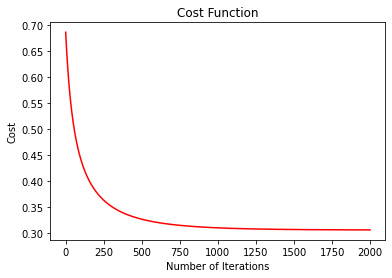


Performance using SPARK:  86.07% 


 NO SPARK 
Confusion matrix:
[[167  30]
 [ 22 147]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       197
         1.0       0.83      0.87      0.85       169

    accuracy                           0.86       366
   macro avg       0.86      0.86      0.86       366
weighted avg       0.86      0.86      0.86       366


Precision Score: 
0.8305084745762712



Performance without SPARK:  85.79%


0.8579234972677595

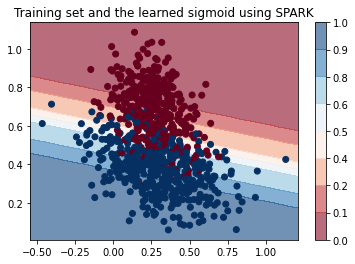

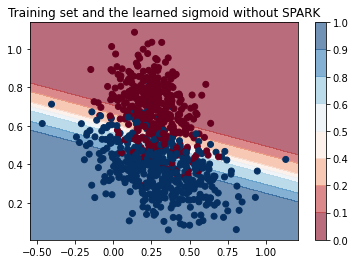

In [ ]:
from sklearn.model_selection import train_test_split

"""
Confronto tra i risultati ottenuti attraverso le funzioni di spark e quelle di libreria. Il dataset 
utilizzato è quello sintetico con solamente due features.
E' possibile settare il numero di iterazioni, il learning_rate ed il momentum nel form in alto
"""

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3)

logistic_regression_spark(XX_train, XX_test, YY_train, YY_test, iterations=iterations,
                          learning_rate=learning_rate, momentum=momentum, plot_flag=True, plot_results_flag=True)

logistic_regression(XX_train, XX_test, YY_train, YY_test, plot_flag=True, plot_results_flag=True)

### Dataset reale usando 2 features selezionate

In [ ]:
#@title 
#@markdown Logistic Regression Parameters
iterations =  2000#@param {type:"integer"}
learning_rate = 0.9 #@param {type:"number"}
momentum = 0.005 #@param {type:"number"}

 USING SPARK



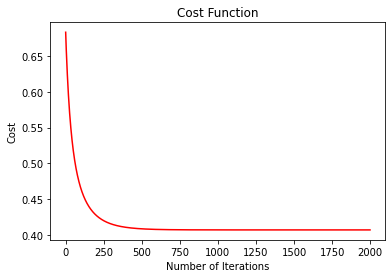


Performance using SPARK:  81.69% 


 NO SPARK 
Confusion matrix:
[[125  39]
 [  4 198]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85       164
         1.0       0.84      0.98      0.90       202

    accuracy                           0.88       366
   macro avg       0.90      0.87      0.88       366
weighted avg       0.90      0.88      0.88       366


Precision Score: 
0.8354430379746836



Performance without SPARK:  88.25%


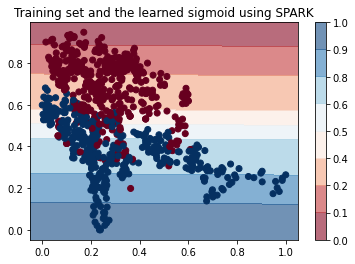

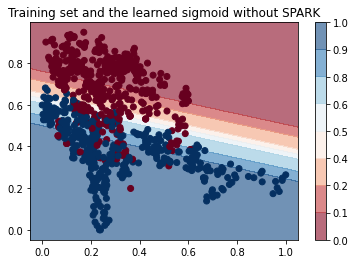

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

"""
Confronto tra i risultati ottenuti attraverso le funzioni di spark e quelle di libreria. Il dataset 
utilizzato è quello reale con solamente le due features selezionate.
E' possibile settare il numero di iterazioni il learning_rate ed il momentum nel form in alto
"""
X_real = pd.concat([data[f1_name], data[f2_name]], axis=1)
Y_real = data['class']

XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)


logistic_regression_spark(XX_train.values, XX_test.values, YY_train.values, (np.array([YY_test.values])).T, iterations=iterations, 
                          learning_rate=learning_rate, momentum=momentum, plot_flag=True, plot_results_flag=True)

logistic_regression(XX_train.values, XX_test.values, YY_train.values, YY_test.values, plot_flag=True, plot_results_flag=True);

### Dataset reale usando una feature alla volta

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np

"""
Vengono inserite nella tabella le performances ottenute dalla regressione logistica applicata su una feature
per volta. Il dataset utilizzato è quello reale
"""
res = []
for feature in features:
    X_real = pd.concat([data[feature]], axis=1)
    Y_real = data['class']

    XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)
    res.append(logistic_regression(XX_train, XX_test, YY_train, YY_test, plot_flag=False, plot_results_flag=False))

table = tabulate(np.array([[f'{r*100:.2f}%' for r in res]]), features, tablefmt="fancy_grid")
print(table)

╒════════════╤════════════╤════════════╤═══════════╕
│ variance   │ skewness   │ curtosis   │ entropy   │
╞════════════╪════════════╪════════════╪═══════════╡
│ 83.88%     │ 70.77%     │ 51.09%     │ 49.45%    │
╘════════════╧════════════╧════════════╧═══════════╛


### Dataset reale usando tutte le coppie di features

In [ ]:
from itertools import combinations
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np

"""
Vengono inserite nella tabella le perfromances ottenute dalla regressione logistica applicata su due 
features per volta. Il dataset utilizzato è quello reale
"""
res = []
for (x1,x2) in combinations(features, 2):
    X_real = pd.concat([data[x1], data[x2]], axis=1)
    Y_real = data['class']

    XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)

    res.append(logistic_regression(XX_train, XX_test, YY_train, YY_test, plot_flag=False, plot_results_flag=False))

table = tabulate(np.array([[f'{r*100:.2f}%' for r in res]]),
                 [f"{x1} + {x2}" for (x1,x2) in combinations(features, 2)],
                 tablefmt="fancy_grid")
print(table)

╒═══════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════╕
│ variance + skewness   │ variance + curtosis   │ variance + entropy   │ skewness + curtosis   │ skewness + entropy   │ curtosis + entropy   │
╞═══════════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════╡
│ 84.43%                │ 86.34%                │ 84.15%               │ 78.42%                │ 73.22%               │ 55.19%               │
╘═══════════════════════╧═══════════════════════╧══════════════════════╧═══════════════════════╧══════════════════════╧══════════════════════╛


### Dataset reale usando tutte le features assieme

In [ ]:
#@title 
#@markdown Logistic Regression Parameters
iterations = 2000 #@param {type:"integer"}
learning_rate = 0.1 #@param {type:"number"}
momentum = 0.005 #@param {type:"number"}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

"""
Confronto tra i risultati ottenuti attraverso le funzioni di spark e quelle di libreria. Il dataset 
utilizzato è quello reale, considerando tutte le features.
E' possibile settare il numero di iterazioni, il learning_rate ed il momentum nel form in alto
"""

X_real = pd.concat([data[feature] for feature in features], axis=1)
Y_real = data['class']

XX_train, XX_test, YY_train, YY_test = train_test_split(X_real, Y_real, test_size=0.3)

logistic_regression_spark(XX_train.values, XX_test.values, YY_train.values, (np.array([YY_test.values])).T, iterations=iterations, 
                          learning_rate=learning_rate, momentum=momentum, plot_flag=False, plot_results_flag=True)

logistic_regression(XX_train, XX_test, YY_train, YY_test, plot_flag=False, plot_results_flag=True);



Performance using SPARK:  89.89% 


Confusion matrix:
[[165   7]
 [  2 192]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       172
         1.0       0.96      0.99      0.98       194

    accuracy                           0.98       366
   macro avg       0.98      0.97      0.98       366
weighted avg       0.98      0.98      0.98       366


Precision Score: 
0.964824120603015



Performance without SPARK:  97.54%


### Dataset sintetico usando tutte le features assieme

In [ ]:
#@title 
#@markdown Logistic Regression Parameters
iterations = 2000 #@param {type:"integer"}
learning_rate = 0.1 #@param {type:"number"}
momentum = 0.005 #@param {type:"number"}

In [ ]:
"""
Confronto tra i risultati ottenuti attraverso le funzioni di spark e quelle di libreria. Il dataset 
utilizzato è quello sintetico, esteso a tutte le features.
E' possibile settare il numero di iterazioni, il learning_rate ed il momentum nel form in alto

N.B. Il numero di campioni in tale dataset può essere modificato andando a settare opportunamente il 
parametro multiplier nell'apposito form
"""

XX_train, XX_test, YY_train, YY_test = train_test_split(XX_full, YY_full, test_size=0.3)

logistic_regression_spark(XX_train, XX_test, YY_train, YY_test, iterations=iterations, 
                          learning_rate=learning_rate, momentum=momentum, plot_flag=False, 
                          plot_results_flag=True)

logistic_regression(XX_train, XX_test, YY_train, YY_test, plot_flag=False, plot_results_flag=True);


Performance using SPARK:  98.75% 


Confusion matrix:
[[2177   16]
 [   9 2190]]


Classifier metrics:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2193
         1.0       0.99      1.00      0.99      2199

    accuracy                           0.99      4392
   macro avg       0.99      0.99      0.99      4392
weighted avg       0.99      0.99      0.99      4392


Precision Score: 
0.9927470534904805



Performance without SPARK:  99.43%
